**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Bonus](#toc1_)    
  - [Before Starting](#toc1_1_)    
  - [**1. Large Language Models (LLMs)** - Expanded explanation](#toc1_2_)    
    - [Programmatic Access vs. Web Interfaces:](#toc1_2_1_)    
    - [Optional Notebook Material for Exploration - Open Source LLMs:](#toc1_2_2_)    
      - [Parameters and Quantization](#toc1_2_2_1_)    
    - [Proprietary LLMs: The Gemini API](#toc1_2_3_)    
    - [Interacting with the Gemini API](#toc1_2_4_)    
    - [**1.1 Multi-Modal Prompting**](#toc1_2_5_)    
      - [**1.1.1 Text + Images**](#toc1_2_5_1_)    
        - [**1.1.1.1 Basic Image Understanding**](#toc1_2_5_1_1_)    
        - [**>>> Bonus 1 (Take home):**](#toc1_2_5_1_2_)    
        - [**1.1.1.2 Segmentation**](#toc1_2_5_1_3_)    
        - [**>>> Bonus 2 (Take home):**](#toc1_2_5_1_4_)    
      - [**1.1.2 Text + Video**](#toc1_2_5_2_)    
        - [**1.1.2.1 Uploading local video:**](#toc1_2_5_2_1_)    
        - [**1.1.2.2 Using YouTube video:**](#toc1_2_5_2_2_)    
      - [**1.1.3 Text + Audio**](#toc1_2_5_3_)    
        - [**>>> Bonus 3 (Take home):**](#toc1_2_5_3_1_)    
    - [**1.2 Tool Calling:**](#toc1_2_6_)    
      - [General Idea](#toc1_2_6_1_)    
        - [**>>> Bonus 4 (Take home):**](#toc1_2_6_1_1_)    
    - [**1.3 Information Extraction and Grounding:** - Expanded explanation](#toc1_2_7_)    
      - [**`langextract`: A Library for Grounded Extraction**](#toc1_2_7_1_)    
        - [**1.3.1 Using a video from youtube:**](#toc1_2_7_1_1_)    
        - [**>>> Bonus 5 (Take home):**](#toc1_2_7_1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Bonus](#toc0_)
This is the bonus points' section for lab 2 phase 2.


## <a id='toc1_1_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_2_'></a>[**1. Large Language Models (LLMs)** - Expanded explanation](#toc0_)

Before we start we strongly suggest that you watch the following video explanations so you can understand the concepts that we are gonna discuss about extra LLMs concepts: 

1. [What Are Vision Language Models? How AI Sees & Understands Images](https://www.youtube.com/watch?v=lOD_EE96jhM)
2. [How do Multimodal AI models work? Simple explanation](https://www.youtube.com/watch?v=WkoytlA3MoQ)
3. [Multi-Modal LLMs for Image, Sound and Video](https://www.youtube.com/watch?v=_sGwL6RAsUc&t=1137s)
4. [What is Tool Calling? Connecting LLMs to Your Data](https://www.youtube.com/watch?v=h8gMhXYAv1k)

`These videos can help you get a better grasp on these additional concepts of LLMs covered in the bonus if you were not familiar before.`

**So now let's start with the bonus content of Lab 2 Phase 2.**

Large Language Models (LLMs) are AI models trained on vast text data to understand and generate human language. Models like GPT and BERT excel at tasks like translation, summarization, and sentiment analysis due to their deep learning techniques and large-scale training. Recently these models got popular with the rise of Open-AI's ChatGPT and their different models, showcasing the potential of these models in a lot of aspects of our current society.

Open-source LLMs are cost-effective and customizable, with strong community support, but may underperform compared to proprietary models (Gemini, ChatGPT, Claude, etc.) and require technical expertise to manage. Proprietary LLMs offer superior performance, ease of use, and regular updates, but can be costly, less flexible, and create dependency on external providers for ongoing access and updates.

Of course. Here is a revised version that frames the explanation objectively, focusing on the practical advantages for a student working on data mining exercises and projects.

### <a id='toc1_2_1_'></a>[Programmatic Access vs. Web Interfaces:](#toc0_)

For this data mining lab, we will interact with LLMs using code (programmatic access) rather than a web-based chatbot. This approach provides several direct advantages for completing your exercises and projects:

*   **Process Datasets Automatically**: Instead of manually copying and pasting individual data points, you can use a simple `for` loop in your code to send every row of a dataset to the model. This allows you to perform tasks like sentiment analysis or data extraction on hundreds or thousands of records efficiently.

*   **Get Structured, Usable Output**: A chatbot provides conversational text that is difficult to use in analysis. With an API, you can command the model to return its output in a specific **JSON format**. This structured data can be directly and reliably loaded into a **pandas DataFrame**, allowing you to immediately continue with your data analysis and visualization tasks.

*   **Ensure Consistent and Reproducible Results**: Scientific and data mining work must be reproducible. By setting parameters like `temperature=0.0` in your code, you make the model's output deterministic. This means you will get the exact same result every time you run your script with the same input, which is essential for debugging your code and validating your findings.

*   **Maintain Data Privacy**: If you work with sensitive or private datasets for a project, uploading that data to a public web interface is not secure. Using an API provides better data governance, and running a model locally with a tool like Ollama ensures your data **never leaves your computer**.

### <a id='toc1_2_2_'></a>[Optional Notebook Material for Exploration - Open Source LLMs:](#toc0_)

For students interested in running models locally, the optional notebook `DM2025-Lab2-Optional-Ollama.ipynb` explores using Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)). Ollama is a powerful library that simplifies running a wide range of open-source LLMs. In that notebook, we will use the **Gemma 3 (4B)** for multi-modal tasks and advanced text-based tasks, **Gemma 3 (270M version)** for simple text-based tasks, **Llama 3.2 (1B version)** for tool calling tasks, and **embedding-gemma (300M params)** to generate embeddings from text data. The Gemma models come from Google's family of models, while Llama 3.2 comes from Meta's family, all of them open source.

To use these models effectively, an **NVIDIA GPU with at least 4 GB of VRAM is recommended**. If you don't have the required hardware, you can run the examples in Kaggle or other cloud notebooks with their free GPU usage tiers activated.

You can explore the variety of models available through Ollama here:

![pic10.png](./pics/pic10.png)

#### <a id='toc1_2_2_1_'></a>[Parameters and Quantization](#toc0_)

In the image, you'll notice that models have a certain number of **parameters**. These are the internal variables the model learns during training, which store its knowledge. A higher parameter count generally leads to a more capable model but also increases its size and the computational resources needed to run it, especially VRAM.

This is where **quantization** becomes crucial. Quantization is a technique to reduce the memory footprint of a model by converting its parameters from high-precision data types (like 32-bit floating-point numbers) to lower-precision ones (like 8-bit integers). This process makes the model smaller and faster, significantly lowering VRAM usage, though it can sometimes cause a minor reduction in accuracy. Thanks to quantization, a 4-billion parameter model like Gemma 3 4B can be run on consumer-grade GPUs more efficiently.

### <a id='toc1_2_3_'></a>[Proprietary LLMs: The Gemini API](#toc0_)

For the main exercises in this lab, we will use **the Gemini API**. This approach offers several advantages over running local open-source models, such as access to state-of-the-art model performance without needing specialized hardware. While the API has usage limits (rate limits and token quotas), it provides a generous **free tier** that is more than sufficient for our exercises.

![pic13.png](./pics/pic13.png)

![pic14.png](./pics/pic14.png)

We will primarily use the **Gemini 2.5 Flash-Lite** (`gemini-2.5-flash-lite`) model. As shown in the rate limit table, this model is optimized for high-frequency tasks and offers a high request-per-day limit of 1,000, making it ideal for completing the lab exercises without interruption.

Students are encouraged to explore other models available through the API but should remain mindful of their respective usage limits. For instance:
*   **Gemini 2.5 Pro** is a more powerful model but has a lower daily request limit of 100.
*   The **Gemma 3** model available via the API offers an impressive 14,400 requests per day, providing another excellent alternative for experimentation.

Please be aware of your usage limits as you work through the exercises to ensure you do not get rate-limited.

[Gemini Documentation](https://ai.google.dev/gemini-api/docs)

[Gemini Rate Limits](https://ai.google.dev/gemini-api/docs/rate-limits)

[Description of Gemini Models](https://ai.google.dev/gemini-api/docs/models)

---

### <a id='toc1_2_4_'></a>[Interacting with the Gemini API](#toc0_)

The code cell below contains the primary function, `prompt_gemini`, that we will use throughout this lab to communicate with the Gemini API. It's designed to be a flexible wrapper that handles the details of sending a request and receiving a response.

Before you run the exercises, here are the key things you need to understand in this setup:

*   **API Key Configuration**: The script loads your API key from a `.env` file located in the `./config/` directory. **You must create this file and add your API key** like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`. This is a security best practice to keep your credentials out of the code.

*   **Global Settings**: At the top of the script, you can find and modify several important defaults:
    *   `MODEL_NAME`: We've set this to `"gemini-2.5-flash-lite"`, but you can easily switch to other models like `"gemini-2.5-pro"` to experiment.
    *   `SYSTEM_INSTRUCTION`: This sets the model's default behavior or persona (e.g., "You are a helpful assistant"). You can customize this for different tasks.
    *   `SAFETY_SETTINGS`: For our academic exercises, these are turned off to prevent interference. In real-world applications, you would configure these carefully.

*   **The `prompt_gemini` function**: This is the main tool you will use. Here are its most important parameters:
    *   `input_prompt`: The list of contents (text, images, etc.) you want to send to the model.
    *   `temperature`: Controls the randomness of the output. `0.0` makes the output deterministic and less creative, while a higher value (e.g., `0.7`) makes it more varied.
    *   `schema`: A powerful feature that allows you to specify a JSON format for the model's output. This is extremely useful for structured data extraction.
    *   `with_tokens_info`: If set to `True`, the function will also return the number of input and output tokens used, which is helpful for monitoring your usage against the free tier limits.

In the following exercises, you will call this function with different prompts and configurations to solve various tasks.

If needed, you can also check some tutorials on how a python function works: [Python Functions Tutorial](https://realpython.com/defining-your-own-python-function/)

---

## <a id='toc1_2_'></a>[**1. 大型語言模型 (LLM)** - 擴充解釋](#toc0_)

在開始之前，我們強烈建議您觀看以下影片講解，以便更好地理解我們將要討論的關於大型語言模型 (LLM) 的額外概念：

1. [什麼是視覺語言模型？人工智慧如何觀察和理解圖像](https://www.youtube.com/watch?v=lOD_EE96jhM)

2. [多模態人工智慧模型的工作原理？簡單解釋](https://www.youtube.com/watch?v=WkoytlA3MoQ)

3. [用於影像、聲音和影片的多模態大型語言模型](https://www.youtube.com/watch?v=_sGwL6RAsUc&t=1137s)

4. [什麼是工具呼叫？ ](https://www.youtube.com/watch?v=_sGwL6RAsUc&t=1137s)將大型語言模型 (LLM) 連接到您的資料](https://www.youtube.com/watch?v=h8gMhXYAv1k)

如果您之前不熟悉 LLM，這些影片可以幫助您更好地理解本部分額外內容中涵蓋的 LLM 相關概念。

**現在讓我們開始學習第二階段實驗的額外內容。 **

大型語言模型 (LLM) 是基於海量文字資料訓練的人工智慧模型，用於理解和產生人類語言。像 GPT 和 BERT 這樣的模型由於採用了深度學習技術和大規模訓練，在翻譯、摘要和情緒分析等任務中表現出色。近年來，隨著 OpenAI 的 ChatGPT 及其各種模型的興起，這些模型變得流行起來，展現了它們在當今社會諸多方面的潛力。

開源 LLM 具有成本效益高、可自訂性強、社群支援強大的優勢，但與專有模型（例如 Gemini、ChatGPT、Claude 等）相比，效能可能略遜一籌，並且需要一定的技術專長才能進行管理。專有LLM（邏輯學習模型）性能卓越、易於使用且定期更新，但成本可能較高、靈活性較差，並且需要依賴外部供應商才能持續存取和更新。

當然。以下是修訂版，客觀地闡述了其優勢，重點關注學生在資料探勘練習和專案中的實際應用。

### [程式化存取 vs. Web介面](#toc0_)

在本資料探勘實驗中，我們將使用程式碼（程式化存取）而非基於Web的聊天機器人與LLM進行互動。這種方法為完成練習和專案提供了以下幾個直接優勢：

* **自動處理資料集**：無需手動複製貼上單一資料點，您可以使用程式碼中的簡單`for`循環將資料集的每一行傳送到模型。這使您可以有效率地對數百或數千筆記錄執行情緒分析或資料擷取等任務。

* **取得結構化、可用的輸出**：聊天機器人提供的對話文字難以用於分析。借助 API，您可以命令模型以特定的**JSON 格式**傳回輸出。這種結構化資料可以直接可靠地載入到**pandas DataFrame**中，讓您可以立即繼續進行資料分析和視覺化任務。

* **確保結果的一致性和可復現性**：科學和資料探勘工作必須具有可複現性。透過在程式碼中設定諸如 `temperature=0.0` 之類的參數，您可以使模型的輸出具有確定性。這意味著每次使用相同的輸入運行腳本時，您都會得到完全相同的結果，這對於偵錯程式碼和驗證發現至關重要。

* **維護資料隱私**：如果您在專案中處理敏感或私人資料集，將這些資料上傳到公共 Web 介面是不安全的。使用 API 可以更好地管理數據，而使用 Ollama 等工具在本地運行模型可以確保您的數據**永遠不會離開您的電腦**。

### <a id='toc1_2_2_'></a>[可選的探索性筆記型電腦材料 - 開源 LLM：](#toc0_)

對於有興趣在本地運行模型的學生，可選筆記本 `DM2025-Lab2-Optional-Ollama.ipynb` 探索如何使用 Ollama（[Ollama GitHub 連結](https://github.com/ollama/ollama)）。 Ollama 是一個強大的函式庫，可以簡化各種開源 LLM 的運作。在該筆記本中，我們將使用 **Gemma 3 (4B)** 處理多模態任務和高級文字任務，**Gemma 3 (270M 版本)** 處理簡單的文字任務，**Llama 3.2 (1B 版本)** 處理工具呼叫任務，以及 **embedding-gemma (300M 參數)** 從文字嵌入資料。 Gemma 模型來自 Google 的模型家族，而 Llama 3.2 來自 Meta 的模型家族，它們都是開源的。

為了有效地使用這些模型，**建議使用至少配備 4 GB 記憶體的 NVIDIA GPU**。如果您沒有所需的硬件，可以在 Kaggle 或其他雲端筆記本中運行範例，並啟用其免費的 GPU 使用套餐。

您可以在這裡探索 Ollama 提供的各種模型：

![pic10.png](./pics/pic10.png)

#### <a id='toc1_2_2_1_'></a>[參數與量化](#toc0_)

在圖中，您會注意到模型具有一定數量的**參數**。這些是模型在訓練過程中學習的內部變量，用於儲存模型的知識。參數數量越多，模型的效能就越好。

通常情況下，這會導致模型效能更強，但也會增加模型的大小以及運行它所需的運算資源，尤其是顯存 (VRAM)。

這時，**量化**就顯得至關重要了。量化是一種透過將模型參數從高精度資料類型（例如 32 位元浮點數）轉換為低精度資料類型（例如 8 位元整數）來減少模型記憶體佔用的技術。這個過程可以縮小模型體積並提高運行速度，顯著降低顯存使用量，儘管有時可能會導致精度略有下降。由於量化，像 Gemma 3 4B 這樣擁有 40 億個參數的模型可以在消費級 GPU 上更有效率地運行。

### <a id='toc1_2_3_'></a>[專有 LLM：Gemini API](#toc0_)

在本實驗的主要練習中，我們將使用**Gemini API**。與運行本地開源模型相比，這種方法具有許多優勢，例如無需專用硬體即可獲得最先進的模型性能。雖然 API 的使用有限制（速率限制和tokens配額），但它提供的**免費套餐**非常慷慨，足以滿足我們的練習需求。

![pic13.png](./pics/pic13.png)

![pic14.png](./pics/pic14.png)

我們將主要使用**Gemini 2.5 Flash-Lite** (`gemini-2.5-flash-lite`) 模型。如速率限製表所示，該模型針對高頻任務進行了最佳化，並提供高達每日 1000 次的請求限制，非常適合不間斷地完成實驗練習。

我們鼓勵學生探索 API 提供的其他模型，但請務必注意它們各自的使用限制。例如：

* **Gemini 2.5 Pro** 功能更強大，但每日請求次數上限為 100 次。

* **Gemini 3** 模型可透過 API 取得，每日請求次數上限高達 14,400 次，是另一個絕佳的實驗選擇。

在進行練習時，請注意您的使用限制，以免受到速率限制。

[Gemini 文件](https://ai.google.dev/gemini-api/docs)

[Gemini 速率限制](https://ai.google.dev/gemini-api/docs/rate-limits)

[Gemini 模式說明](https://ai.google.dev/gemini-api/docs/models)

In [12]:
import os
from dotenv import load_dotenv
from google import genai
from google.genai import types

env_path = "./config/.env"
load_dotenv(dotenv_path=env_path)

# 系統指令可以指示模型在輸出中的行為方式，可根據需要自訂
SYSTEM_INSTRUCTION = (
        "You are a helpful assistant"
    )

# 模型可以輸出的最大tokens數量，Gemini 2.5 模型具有此最大值
# 對於其他模型需要檢查其文檔
MAX_OUTPUT_TOKENS = 65535
MODEL_NAME = "gemini-2.5-flash-lite" # 其他模型: "gemini-2.5-pro", "gemini-2.5-flash"; 檢查不同的最大輸出tokens: "gemini-2.0-flash" , "gemini-2.0-flash-lite" 

# 我們停用安全設定，因為我們的任務不需要審核
SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT", threshold="OFF")
]

# 我們輸入 API 金鑰以便能夠使用 Gemini 模型
api_key = os.getenv("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = api_key
client = genai.Client(api_key=api_key)

# 我們也設定 LangExtract 使用相同的 API 金鑰:
if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = api_key

def prompt_gemini(
        input_prompt: list,
        schema = None,
        temperature: float = 0.0,
        system_instruction: str = SYSTEM_INSTRUCTION,
        max_output_tokens: int = MAX_OUTPUT_TOKENS,
        client: genai.Client = client,
        model_name: str = MODEL_NAME,
        new_config: types.GenerateContentConfig = None,
        with_tools: bool = False,
        with_parts: bool = False,
        with_tokens_info: bool = False
    ):
        try:
            # 如果我們需要 JSON 架構，我們進行以下設定
            if schema:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    response_mime_type="application/json",
                    response_schema=schema,
                    safety_settings=SAFETY_SETTINGS
                )
            # 如果不需要，我們將其保持為非結構化
            else:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    safety_settings=SAFETY_SETTINGS
                )
            
            # 如果我們需要不同的自訂配置，我們將其新增
            if new_config:
                generate_content_config = new_config
            
            # 對於某些任務，我們需要一種更特定的方式來在提示模型時新增內容
            # 因此有時我們需要來自 "types" 物件的自訂部分
            if with_parts:
                response = client.models.generate_content(
                    model=model_name,
                    contents=types.Content(parts=input_prompt),
                    config=generate_content_config,
                )
            # 以最簡單的形式，內容可以表示為簡單物件（例如 str 和 Pillow 影像）的清單 []
            else:
                response = client.models.generate_content(
                    model=model_name,
                    contents=input_prompt,
                    config=generate_content_config,
                )

            if with_tools:
                # print(response)
                # 函式呼叫時包含原始回應
                completion = response
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    return completion, log
                return completion
            else:
                completion = response.text
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    # 傳回文字回應和日誌（如果選取）
                    return completion, log
                return completion
        except Exception as e:
             print(f"Error occurred when generating response, error: {e}")
             return None

Both GOOGLE_API_KEY and GEMINI_API_KEY are set. Using GOOGLE_API_KEY.


---
### <a id='toc1_2_5_'></a>[**1.1 Multi-Modal Prompting**](#toc0_)

Multi-modal prompting involves using input from multiple sources or modes, such as text, images, video or audio, to guide a model's response. It allows AI to process and generate information based on more than one type of input.

---
#### <a id='toc1_2_5_1_'></a>[**1.1.1 Text + Images**](#toc0_)

Gemini's multimodal capabilities allow it to perform sophisticated **image understanding**, turning unstructured visual data into analyzable information. Beyond basic tasks like captioning or answering questions about an image's content, it offers powerful features for data extraction:

*   **Object Detection**: The model can identify objects and return their **bounding box coordinates**, providing structured location data.
*   **Image Segmentation**: It can go a step further by providing a precise pixel-level **segmentation mask**, outlining the exact shape of detected objects.

You can provide single or multiple images by either **uploading a file** (for large images or reuse) or passing the image data **inline** within your API request.

We are going to explore how to prompt our model for basic image understanding and how to use the Gemini's segmentation capabilities.

For more information you can visit the following link: [Gemini's Image Understanding Documentation](https://ai.google.dev/gemini-api/docs/image-understanding)

---
##### <a id='toc1_2_5_1_1_'></a>[**1.1.1.1 Basic Image Understanding**](#toc0_)

For basic image understanding, the model receives both an image and a related text prompt. The image provides visual context, while the text gives additional guidance. The model uses both inputs to generate more accurate and contextually relevant responses, which is useful for tasks like image captioning, visual question answering, or content generation based on visual cues.

---

### <a id='toc1_2_5_'></a>[**1.1 多模態提示**](#toc0_)

多模態提示是指使用來自多種來源或模式（例如文字、圖像、視訊或音訊）的輸入來引導模型的回應。它使人工智慧能夠基於多種類型的輸入來處理和產生資訊。

---

#### <a id='toc1_2_5_1_'></a>[**1.1.1 文字 + 圖像**](#toc0_)

Gemini 的多模態功能使其能夠執行複雜的**影像理解**，將非結構化的視覺資料轉化為可分析的資訊。除了諸如添加圖像描述或回答有關圖像內容的問題等基本任務之外，它還提供了強大的數據提取功能：

* **目標偵測**：該模型可以識別目標並傳回其**邊界框座標**，從而提供結構化的位置資料。

* **影像分割**：它還可以更進一步，提供精確的像素級**分割遮罩**，勾勒出偵測到物件的精確形狀。

您可以透過**上傳檔案**（適用於大型圖像或需要重複使用的圖像）或在 API 請求中**內聯**傳遞圖像資料來提供單張或多張圖像。

我們將探討如何引導模型進行基本的影像理解，以及如何使用 Gemini 的分割功能。

更多信息，請訪問以下鏈接：[Gemini 圖像理解文檔](https://ai.google.dev/gemini-api/docs/image-understanding)

---

##### <a id='toc1_2_5_1_1_'></a>[**1.1.1.1 基本影像理解**](#toc0_)

對於基本的圖像理解，模型會接收圖像和相關的文字提示。圖像提供視覺上下文，而文字提供額外的指導。該模型利用兩種輸入來產生更準確、更符合情境的回應，這對於影像描述、視覺問答或基於視覺線索的內容生成等任務非常有用。

Let's look at the following images that are in the `pics` folder in the directory of this notebook:

![example1.png](./pics/example1.png)

source: https://cooljapan-videos.com/tw/articles/epe0y86g

![example2.jpg](./pics/example2.jpg)

source: https://www.istockphoto.com/photo/young-cat-scottish-straight-gm1098182434-294927481

We will use our selected Gemini model to request a description of the images:

In [3]:
from PIL import Image
from IPython.display import display, Markdown

image_example_1 = Image.open('./pics/example1.png')

input_prompt_img = ["What is this image about?", image_example_1]
text_response_1, logs_1 = prompt_gemini(input_prompt = input_prompt_img, with_tokens_info = True)
display(Markdown(text_response_1))

The image is about a Shiba Inu dog running joyfully across a grassy field. The dog is captured mid-air, with its mouth open in a happy expression and its tail curled over its back. The background is blurred, suggesting motion and focusing attention on the energetic dog.

In [4]:
print(logs_1)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 271, 'output_tokens': 55}


In [5]:
from PIL import Image

image_example_2 = Image.open('./pics/example2.jpg')

input_prompt_img_2 = ["What is this image about?", image_example_2]
text_response_2, logs_2 = prompt_gemini(input_prompt = input_prompt_img_2, with_tokens_info = True)
display(Markdown(text_response_2))

The image is about a tabby cat standing on a white background. The cat is facing the camera with its tail held high. It has a striped coat and yellow eyes.

In [6]:
print(logs_2)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 271, 'output_tokens': 34}


---
##### <a id='toc1_2_5_1_2_'></a>[**>>> Bonus 1 (Take home):**](#toc0_)

Try asking the model with one image of your choosing. Is the description accurate? Why?

##### <a id='toc1_2_5_1_2_'></a>[**>>> 獎勵 1（帶回家）：**](#toc0_)

試著用你選擇的一張圖片詢問模型。描述準確嗎？為什麼？

# Answer here
![Bonus_1](./pics/Bonus_1.png)


In [7]:
from PIL import Image

image_example_3 = Image.open('./pics/Bonus_1.png')

input_prompt_img_3 = ["What is this image about?", image_example_3]
text_response_3, logs_3 = prompt_gemini(input_prompt = input_prompt_img_3, with_tokens_info = True)
display(Markdown(text_response_3))

The image depicts a person dressed in a costume inspired by the anime series "Demon Slayer: Kimetsu no Yaiba." The person is wearing a white fox mask with blue floral accents, a black haori (a traditional Japanese jacket) with geometric patterns, and khaki cargo shorts. They are holding a sword, and the background features swirling blue water effects and sparkling particles, suggesting a connection to the "Water Breathing" technique from the anime. The Japanese text on the right side of the image, "水の呼吸" (Mizu no Kokyū), directly translates to "Water Breathing," further confirming the theme.

### 我的觀察
模型辦視圖片的能力非常厲害，有將圖片是哪部動漫與圖內的文字、背景、意象等等都描述出來

### My Observation 

The model's ability to interpret images is incredibly impressive; it can describe which anime the image is from, along with the text, background, imagery, and so on within the image.

---
##### <a id='toc1_2_5_1_3_'></a>[**1.1.1.2 Segmentation**](#toc0_)

Beyond simply detecting objects, we can prompt Gemini to perform **image segmentation**, which involves predicting the precise pixel-level contour or "mask" for each object. [Gemini's Segmentation Documentation](https://ai.google.dev/gemini-api/docs/image-understanding#segmentation)

To understand this process, it's helpful to remember how computer vision models "see" images. A model doesn't perceive a picture; it sees a grid of numbers (pixels). Traditional segmentation models are trained specifically to classify every single pixel in this grid, assigning it to a class (e.g., "cat," "dog," "background"). This usually requires a highly specialized model trained on vast, manually labeled datasets.

Gemini offers a powerful alternative, performing this complex task without needing a specialized model. Its output, however, reflects these underlying computer vision principles. When asked to segment an image, Gemini returns a structured JSON list. For each detected object, it provides:

*   **`"box_2d"`**: A bounding box with normalized coordinates `[y0, x0, y1, x1]`. Normalizing coordinates (scaling them to a standard range like 0-1000) is a common preprocessing step in machine learning that makes calculations consistent regardless of the original image size. Our code will need to "de-normalize" these coordinates back to the image's actual pixel dimensions.
*   **`"label"`**: A text label identifying the object.
*   **`"mask"`**: The segmentation mask itself, provided as a **base64 encoded PNG**. This encoding is a standard way to represent binary image data as a text string within a JSON response. The mask is not a simple binary outline but a **probability map**, where each pixel's brightness (0-255) represents the model's confidence that it belongs to the object.

Therefore, to visualize the result, our code must perform a few key post-processing steps: decode the base64 string back into an image, resize this small mask to fit the dimensions of its bounding box, and finally, apply a confidence threshold (e.g., any pixel value > 127) to create the final binary mask.

If you are interested in the topic you can check these extra tutorials on image classification and segmentation: 

[PyTorch Image Classification](https://github.com/bentrevett/pytorch-image-classification)

[Train your image classifier model with PyTorch](https://learn.microsoft.com/en-us/windows/ai/windows-ml/tutorials/pytorch-train-model)

[Python | Image Classification using Keras](https://www.geeksforgeeks.org/machine-learning/python-image-classification-using-keras/)

[Image Segmentation using Python's scikit-image module](https://www.geeksforgeeks.org/machine-learning/image-segmentation-using-pythons-scikit-image-module/)

[Mediapipe | Image segmentation guide for Python](https://ai.google.dev/edge/mediapipe/solutions/vision/image_segmenter/python)

**We are going to utilize the following image:**

![example3.jpg](./pics/example3.jpg)

source: https://www.pexels.com/photo/a-black-dog-and-orange-tabby-cat-fighting-on-the-road-10140894/


---

##### <a id='toc1_2_5_1_3_'></a>[**1.1.1.2 影像分割**](#toc0_)

除了簡單的物體偵測之外，我們還可以指示 Gemini 執行**影像分割**，這涉及預測每個物體的精確像素級輪廓或「遮罩」。 [Gemini 分割文件](https://ai.google.dev/gemini-api/docs/image-understanding#segmentation)

為了理解這個過程，了解電腦視覺模型如何「看到」圖像會很有幫助。模型感知的不是一幅完整的影像，而是由數字（像素）組成的網格。傳統的分割模型經過專門訓練，能夠對網格中的每個像素進行分類，並將其分配到一個類別（例如，「貓」、「狗」、「背景」）。這通常需要一個高度專業化的模型，該模型需要在龐大的、人工標註的資料集上進行訓練。

Gemini 提供了一個強大的替代方案，無需專門的模型即可完成這項複雜的任務。然而，其輸出結果體現了電腦視覺的基本原理。當被要求分割影像時，Gemini 會傳回一個結構化的 JSON 清單。對於檢測到的每個對象，它提供以下資訊：

* **`"box_2d"`**：一個邊界框，其座標已歸一化為 `[y0, x0, y1, x1]`。座標歸一化（將其縮放到 0-1000 等標準範圍）是機器學習中常見的預處理步驟，它可以確保計算結果的一致性，而無需考慮原始影像的大小。我們的程式碼需要將這些座標「反歸一化」回影像的實際像素尺寸。

* **`"label"`**：用於標識物件的文字標籤。

* **`"mask"`**：分割遮罩本身，以 **base64 編碼的 PNG** 格式提供。這種編碼方式是將二進位影像資料表示為 JSON 回應中的文字字串的標準方法。此遮罩並非簡單的二值輪廓，而是一個**機率圖**，其中每個像素的亮度（0-255）代表模型認為該像素屬於目標物件的置信度。

因此，為了視覺化結果，我們的程式碼必須執行幾個關鍵的後處理步驟：將 base64 字串解碼回圖像，調整該小掩碼的大小以適應其邊界框的尺寸，最後應用置信度閾值（例如，任何像素值 > 127）來創建最終的二值掩碼。

如果您對此主題感興趣，可以查看以下關於圖像分類和分割的額外教學：

[PyTorch 影像分類](https://github.com/bentrevett/pytorch-image-classification)

[使用 PyTorch 訓練您的圖像分類器模型](https://learn.microsoft.com/en-us/windows/ai/windows-ml/tutorials/pytorch-train-model)

[Python |使用 Keras 進行影像分類](https://www.geeksforgeeks.org/machine-learning/python-image-classification-using-keras/)

[使用 Python 的 scikit-image 模組進行影像分割](https://www.geeksforgeeks.org/machine-learning/image-segmentation-using-pythons-scikit-image-module/)

[Mediapipe | Python 影像分割指南](https://ai.google.dev/edge/mediapipe/solutions/vision/image_segmenter/python)

**我們將使用以下圖像：**

![example3.jpg](./pics/example3.jpg)

資料來源：https://www.pexels.com/photo/a-black-dog-and-orange-tabby-cat-fighting-on-the-road-10140894/

In [13]:
def parse_json(json_output: str):
  # 解析出 markdown 柵欄
  # 作為雙重驗證措施
  lines = json_output.splitlines()
  for i, line in enumerate(lines):
    if line == "```json":
      json_output = "\n".join(lines[i+1:])  # 移除 "```json" 前的所有內容
      json_output = json_output.split("```")[0]  # 移除關閉 "```" 後的所有內容
      break  # 找到 "```json" 後退出迴圈
  return json_output.strip()

def extract_segmentation_masks(image_path: str, items_to_detect: str, schema, model_name: str = "gemini-2.5-flash-lite", output_dir: str = "segmentation_outputs"):
  # 繪製邊界框、遮罩和標籤的顏色
  HIGH_CONTRAST_COLORS = [
      (255, 0, 0),      # 紅色
      (0, 255, 0),      # 萊姆綠
      (0, 0, 255),      # 藍色
      (255, 255, 0),    # 黃色
      (0, 255, 255),    # 青色
      (255, 0, 255),    # 洋紅
      (255, 165, 0),    # 橙色
      (0, 128, 128),    # 藍綠色
      (128, 0, 128),    # 紫色
      (255, 192, 203),  # 粉紅色
      (0, 250, 154),    # 中等春綠色
      (255, 215, 0),    # 金色
  ]
  # 加載並調整影像大小
  im = Image.open(image_path)
  im.thumbnail([1024, 1024], Image.Resampling.LANCZOS)

  prompt = f"""
  Give the segmentation masks for the {items_to_detect}.
  Output a JSON list of segmentation masks where each entry contains the 2D
  bounding box in the key "box_2d", the segmentation mask in key "mask", and
  the text label in the key "label". Use descriptive labels.
  """
  config = types.GenerateContentConfig(
    response_mime_type="application/json",
    thinking_config=types.ThinkingConfig(thinking_budget=0) # 設定 thinking_budget 為 0 以在物件檢測中獲得更好的結果
  )
  input_prompt = [prompt, im]
  response = prompt_gemini(input_prompt = input_prompt, model_name = model_name, schema=schema, new_config=config)
  print(f"原始回應: {response[:500] if response else '空回應'}...")  # 調試信息
  
  # 解析 JSON 回應
  try:
    parsed_json = parse_json(response)
    print(f"解析後的 JSON: {parsed_json[:500]}...")  # 調試信息
    items = json.loads(parsed_json)
  except json.JSONDecodeError as e:
    print(f"JSON 解析錯誤: {e}")
    print(f"嘗試解析的內容: {parsed_json}")
    raise

  # 建立輸出目錄
  os.makedirs(output_dir, exist_ok=True)

  # 建立原始影像的副本以在其上繪製所有結果
  final_result_image = im.convert("RGBA")

  # 處理每個遮罩
  for i, item in enumerate(items):
      # 取得邊界框座標
      box = item["box_2d"]
      y0 = int(box[0] / 1000 * im.size[1])
      x0 = int(box[1] / 1000 * im.size[0])
      y1 = int(box[2] / 1000 * im.size[1])
      x1 = int(box[3] / 1000 * im.size[0])

      # 跳過無效的邊界框
      if y0 >= y1 or x0 >= x1:
          continue

      # 處理遮罩
      png_str = item["mask"]
      if not png_str.startswith("data:image/png;base64,"):
          continue

      # 移除前綴
      png_str = png_str.removeprefix("data:image/png;base64,")
      mask_data = base64.b64decode(png_str)
      mask = Image.open(io.BytesIO(mask_data))

      # 調整遮罩大小以符合邊界框
      mask = mask.resize((x1 - x0, y1 - y0), Image.Resampling.BILINEAR)

      # 將遮罩轉換為 numpy 陣列以供處理
      mask_array = np.array(mask)

      # 為當前項目產生隨機顏色
      random_color = random.choice(HIGH_CONTRAST_COLORS)

      # 建立新的透明影像以在其上繪製著色遮罩
      mask_overlay = Image.new('RGBA', final_result_image.size, (0, 0, 0, 0))
      mask_draw = ImageDraw.Draw(mask_overlay)

      # 將遮罩像素繪製到透明疊加層上並使用隨機顏色
      # Alpha 通道（透明度）設定為 150（共 255）
      for y in range(y1 - y0):
          for x in range(x1 - x0):
              if mask_array[y, x] > 128:  # 遮罩的閾值
                  mask_draw.point((x + x0, y + y0), fill=(*random_color, 150))

      # 將著色遮罩組合到最終結果影像上
      final_result_image = Image.alpha_composite(final_result_image, mask_overlay)

      # 建立新的繪製物件以在更新的影像上繪製方框和標籤
      final_draw = ImageDraw.Draw(final_result_image)

      # 繪製邊界框
      final_draw.rectangle([x0, y0, x1, y1], outline=random_color, width=3)

      # 繪製標籤文字
      final_draw.text((x0, y0 - 15), item['label'], fill=random_color)

      # 為此遮罩建立疊加層
      overlay = Image.new('RGBA', im.size, (0, 0, 0, 0))
      overlay_draw = ImageDraw.Draw(overlay)

      # 為遮罩建立疊加層
      color = (255, 255, 255, 200)
      for y in range(y0, y1):
          for x in range(x0, x1):
              if mask_array[y - y0, x - x0] > 128:  # 遮罩的閾值
                  overlay_draw.point((x, y), fill=color)

      # 儲存個別遮罩及其疊加層
      mask_filename = f"{item['label']}_{i}_mask.png"
      overlay_filename = f"{item['label']}_{i}_overlay.png"

      mask.save(os.path.join(output_dir, mask_filename))

      # 建立並儲存疊加層
      composite = Image.alpha_composite(im.convert('RGBA'), overlay)
      composite.save(os.path.join(output_dir, overlay_filename))
      print(f"Saved mask and overlay for {item['label']} to {output_dir}")
  
  # 儲存最終結果影像
  final_image_path = os.path.join(output_dir, f"final_result_{items_to_detect}.png")
  final_result_image.save(final_image_path)
  print(f"\nSaved final integrated result to {final_image_path}")

response: [
  {"box_2d": [532, 428, 768, 689], "mask": "", "label": "a ginger cat on a dog"},
  {"box_2d": [656, 447, 934, 721], "mask": "", "label": "a black dog"}
]
Saved mask and overlay for a ginger cat on a dog to segmentation_outputs
Saved mask and overlay for a black dog to segmentation_outputs
Saved mask and overlay for a ginger cat on a dog to segmentation_outputs
Saved mask and overlay for a black dog to segmentation_outputs

Saved final integrated result to segmentation_outputs\final_result_Animals.png

Saved final integrated result to segmentation_outputs\final_result_Animals.png

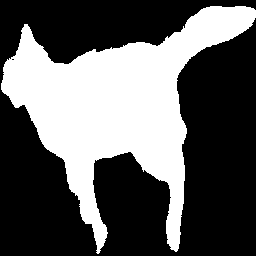
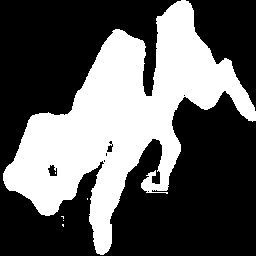

In [9]:
image_example_3 = "./pics/example3.jpg"
items_to_detect = "Animals"
extract_segmentation_masks(image_example_3, items_to_detect, schema=list[Element])

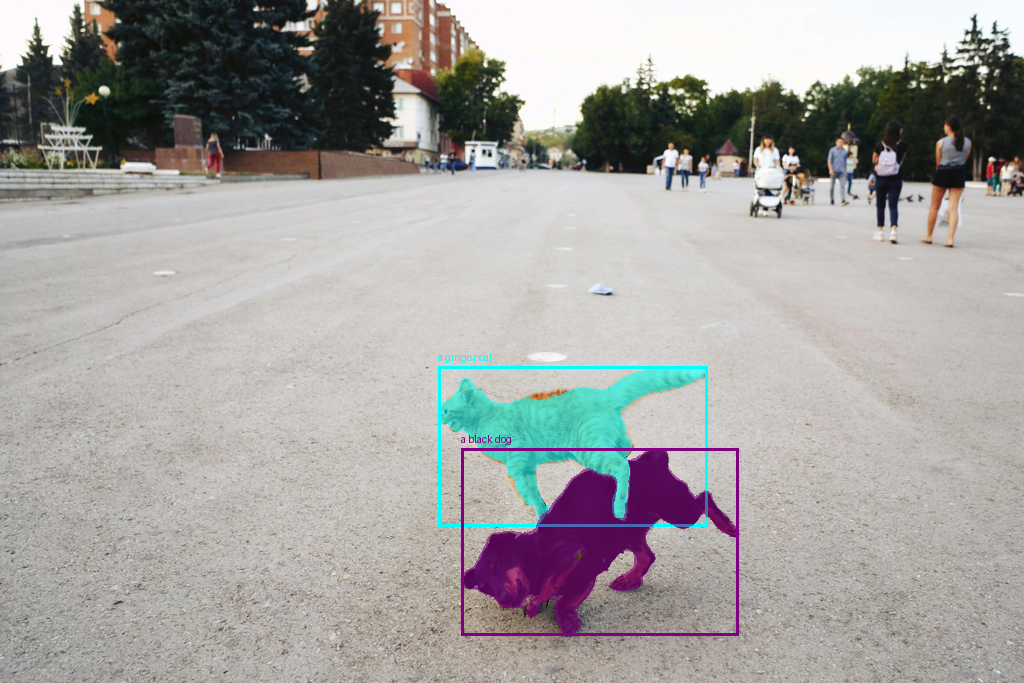

In [10]:
from IPython.display import Image as IMG
IMG(filename='./results/segmentation_outputs/final_result_Animals.png')

response: [
  {"box_2d": [195, 198, 257, 213], "mask": "", "label": "a person"},
  {"box_2d": [197, 737, 307, 763], "mask": "", "label": "a person"},
  {"box_2d": [195, 850, 357, 883], "mask": "", "label": "a person"},
  {"box_2d": [210, 647, 287, 663], "mask": "", "label": "a person"},
  {"box_2d": [217, 660, 282, 678], "mask": "", "label": "a person"},
  {"box_2d": [205, 759, 310, 782], "mask": "", "label": "a person"},
  {"box_2d": [200, 805, 300, 838], "mask": "", "label": "a person"},
  {"box_2d": [177, 899, 362, 950], "mask": "", "label": "a person"},
  {"box_2d": [230, 984, 292, 1000], "mask": "", "label": "a person"},
  {"box_2d": [217, 962, 285, 980], "mask": "", "label": "a person"}
]
Saved mask and overlay for a person to segmentation_outputs
Saved mask and overlay for a person to segmentation_outputs
Saved mask and overlay for a person to segmentation_outputs
Saved mask and overlay for a person to segmentation_outputs
Saved mask and overlay for a person to segmentation_outp
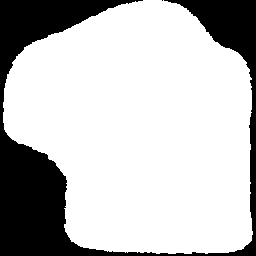
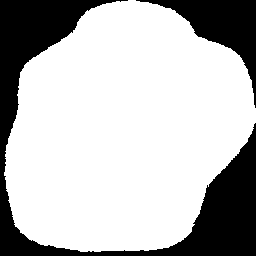
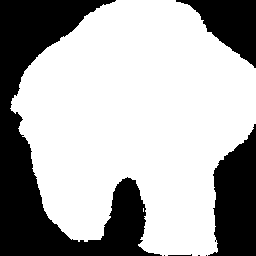
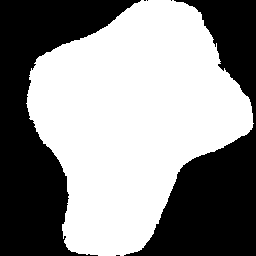
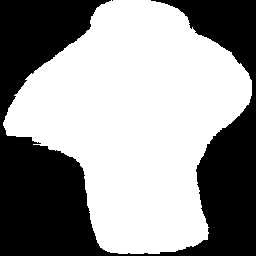
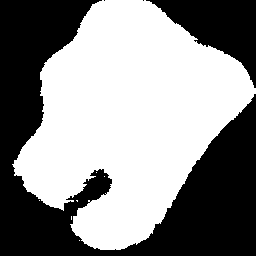
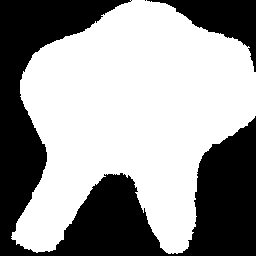
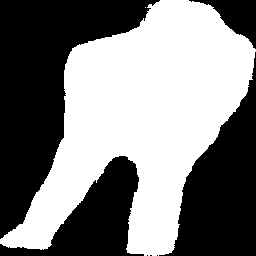
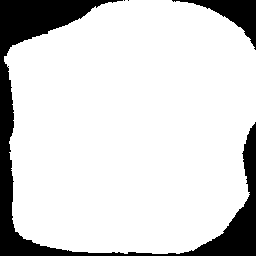
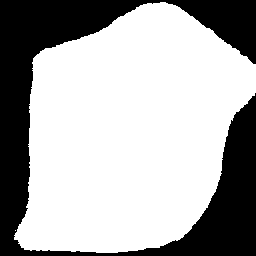

In [11]:
items_to_detect_2 = "People"
extract_segmentation_masks(image_example_3, items_to_detect_2, schema=list[Element])

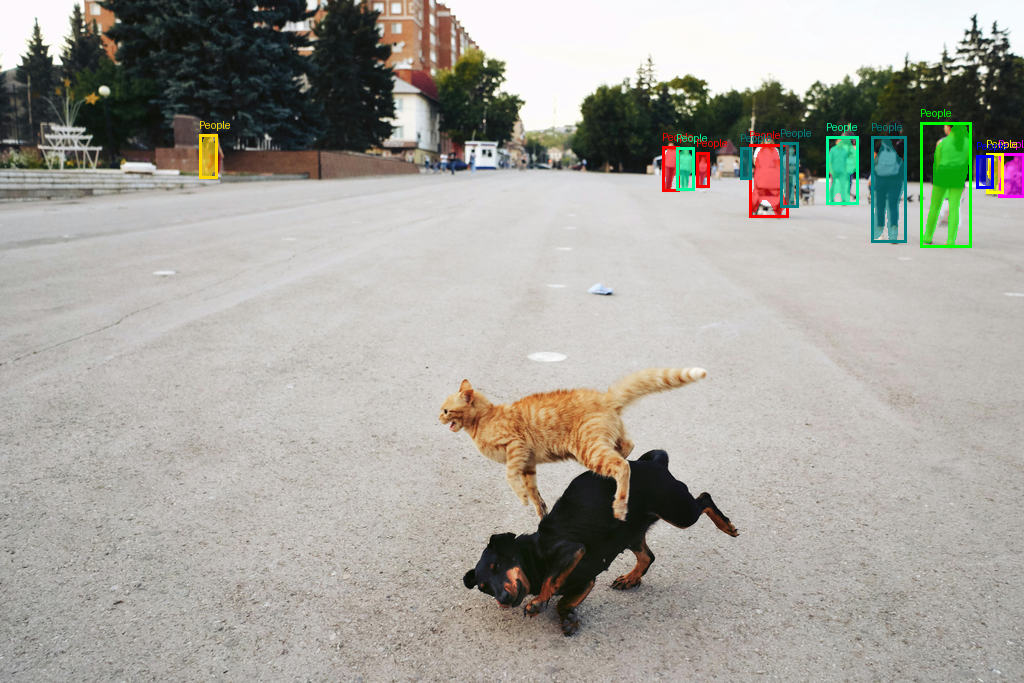

In [12]:
from IPython.display import Image as IMG
IMG(filename='./results/segmentation_outputs/final_result_People.png')

---
##### <a id='toc1_2_5_1_4_'></a>[**>>> Bonus 2 (Take home):**](#toc0_)

Try asking the model with `another image` of your choosing with `different types of elements`, prompt the model to make the segmentation on one type of element. Try again with a `stronger Gemini model`. **Discuss and compare** the results from both models.

##### <a id='toc1_2_5_1_4_'></a>[**>>> 附加練習 2（課後練習）：**](#toc0_)

嘗試使用您選擇的包含不同類型元素的「另一張圖片」來測試模型，並要求模型對其中一種類型的元素進行分割。然後使用“更強大的 Gemini 模型”再次嘗試。 **討論並比較**兩個模型的測試結果。

![Bonus_2.png](./pics/Bonus_2.png)

In [ ]:


image_bonus_2 = R"pics\Bonus_2.png"
items_to_detect_bonus = "Vehicles"  

print("===  使用 gemini-2.5-flash-lite 模型 (Using gemini-2.5-flash-lite model) ===\n")
extract_segmentation_masks(image_bonus_2, items_to_detect_bonus, schema=list[Element], model_name="gemini-2.5-flash-lite")




===  使用 gemini-2.5-flash-lite 模型 (Using gemini-2.5-flash-lite model) ===

原始回應: [
  {"box_2d": [325, 845, 380, 941], "mask": "...
解析後的 JSON: [
  {"box_2d": [325, 845, 380, 941], "mask": "...
Saved mask and overlay for Vehicles to segmentation_outputs
Saved mask and overlay for Vehicles to segmentation_outputs
Saved mask and overlay for Vehicles to segmentation_outputs
Saved mask and overlay for Vehicles to segmentation_outputs
Saved mask and overlay for Vehicles to segmentation_outputs
Saved mask and overlay for Vehicles to segmentation_outputs

Saved final integrated result to segmentation_outputs\final_result_Vehicles.png


In [ ]:
import shutil

# 檔案重命名
original_file = "segmentation_outputs/final_result_Vehicles.png"
new_file = "segmentation_outputs/final_result_Vehicles_1.png"

if os.path.exists(original_file):
    shutil.move(original_file, new_file)
    print(f"已將檔案從 {original_file} 重命名為 {new_file}")
else:
    print(f"找不到檔案 {original_file}")

已將檔案從 segmentation_outputs/final_result_Vehicles.png 重命名為 segmentation_outputs/final_result_Vehicles_1.png


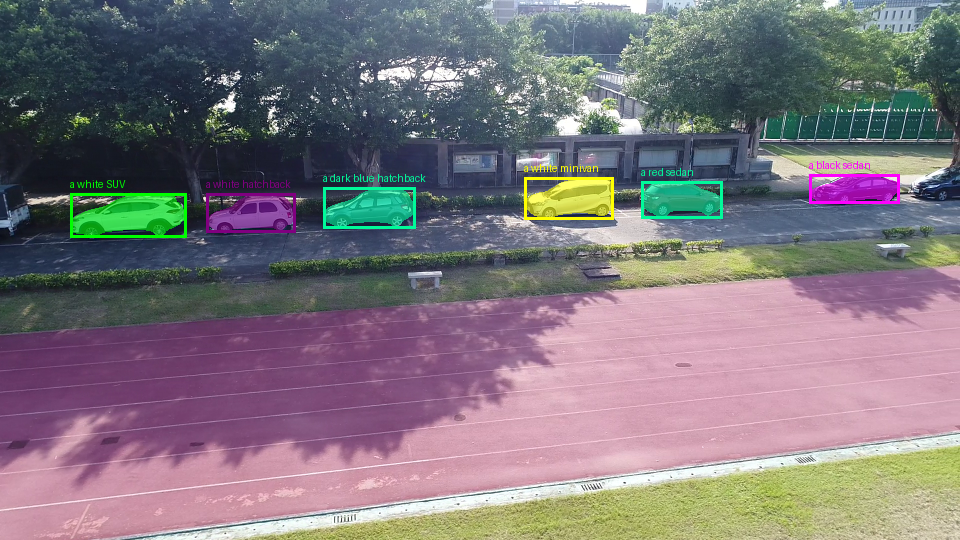

In [16]:
from IPython.display import Image as IMG
IMG(filename='segmentation_outputs/final_result_Vehicles_1.png')

In [17]:
# 嘗試更強大的模型 (Try with stronger model)
print("===  使用 gemini-2.5-flash 模型 ( Using gemini-2.5-flash) ===\n")
extract_segmentation_masks(image_bonus_2, items_to_detect_bonus, schema=list[Element], model_name="gemini-2.5-flash")


===  使用 gemini-2.5-flash 模型 ( Using gemini-2.5-flash) ===

原始回應: [
  {"box_2d": [330, 0, 442, 36], "mask": "...
解析後的 JSON: [
  {"box_2d": [330, 0, 442, 36], "mask": "...
Saved mask and overlay for Vehicle to segmentation_outputs
Saved mask and overlay for white SUV to segmentation_outputs
Saved mask and overlay for white compact car to segmentation_outputs
Saved mask and overlay for blue SUV to segmentation_outputs
Saved mask and overlay for silver minivan to segmentation_outputs
Saved mask and overlay for red sedan to segmentation_outputs
Saved mask and overlay for black sedan to segmentation_outputs
Saved mask and overlay for black sedan to segmentation_outputs

Saved final integrated result to segmentation_outputs\final_result_Vehicles.png


In [18]:
import shutil

# 檔案重命名
original_file = "segmentation_outputs/final_result_Vehicles.png"
new_file = "segmentation_outputs/final_result_Vehicles_2.png"

if os.path.exists(original_file):
    shutil.move(original_file, new_file)
    print(f"已將檔案從 {original_file} 重命名為 {new_file}")
else:
    print(f"找不到檔案 {original_file}")

已將檔案從 segmentation_outputs/final_result_Vehicles.png 重命名為 segmentation_outputs/final_result_Vehicles_2.png


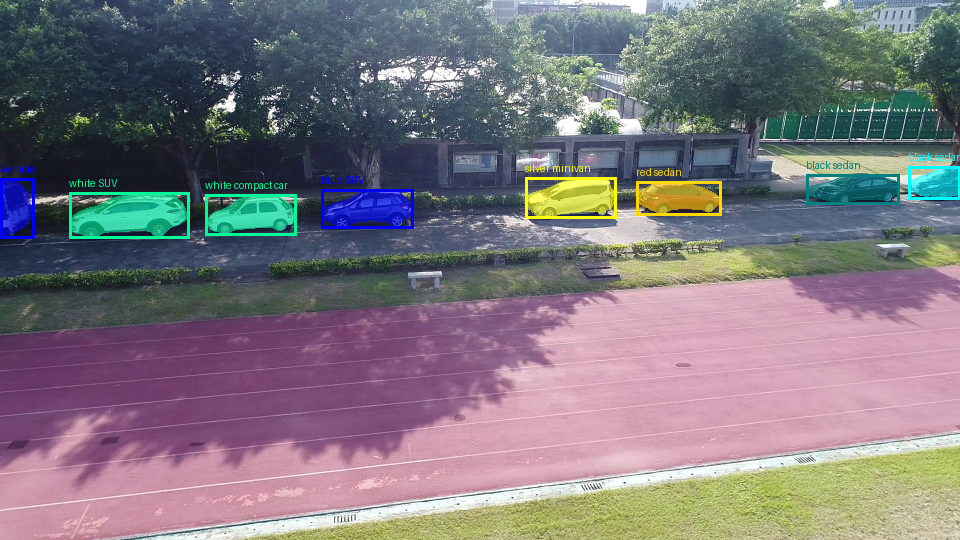

In [19]:

from IPython.display import Image as IMG
IMG(filename='segmentation_outputs/final_result_Vehicles_2.png')


### 我的觀察

仔細看會發現圖片中左右邊被畫面切一半的車子，gemini-2.5-flash-lite 辨識不出來，gemini-2.5-flash 能就將被車切到的車輛也辨識出來

### My Observations

A closer look reveals that the Gemini-2.5-flash-lite cannot identify the car whose left and right sides are cut off by the image, while the Gemini-2.5-flash  can identify the car whose image is cut off.

---
#### <a id='toc1_2_5_2_'></a>[**1.1.2 Text + Video**](#toc0_)

Modern LLMs like Gemini are multimodal, meaning they can analyze **video content** to extract information, generate summaries, and answer specific questions. This capability turns unstructured video into a source of analyzable data, which is highly valuable for data mining tasks.

Gemini processes video by analyzing both its **visual track** (by sampling frames at one frame-per-second by default) and its **audio track** simultaneously.

We are going to explore how to process local video files and YouTube URLs, and how to do timestamp queries and video clipping, although this last one will be discussed in section `10.5 Information Extraction and Grounding`.

**Important Note on Token Usage:** Be aware that video processing is extremely **token-intensive**, consuming hundreds of tokens for every second of video. Use features like clipping and short video clips to manage your usage effectively, especially on the free tier.

[Gemini's Video Understanding Documentation](https://ai.google.dev/gemini-api/docs/video-understanding)


---

#### <a id='toc1_2_5_2_'></a>[**1.1.2 文字 + 影片**](#toc0_)

像 Gemini 這樣的現代語言學習模型 (LLM) 是多模態的，這意味著它們可以分析**視訊內容**來提取資訊、生成摘要並回答特定問題。這種能力將非結構化視訊轉化為可分析的資料來源，這對資料探勘任務來說極具價值。

Gemini 透過同時分析視訊的**視覺軌道**（預設以每秒一幀的速度採樣）和**音訊軌道**來處理視訊。

我們將探討如何處理本地視訊檔案和 YouTube URL，以及如何進行時間戳查詢和影片剪輯，儘管最後一點將在「10.5 資訊提取和基礎化」部分討論。

**關於tokens使用的重要提示：** 請注意，視訊處理極度**消耗tokens**，每秒視訊都會消耗數百個tokens。使用剪輯和短影片片段等功能可以有效管理tokens使用，尤其是在免費套餐中。

[Gemini 影片理解文件](https://ai.google.dev/gemini-api/docs/video-understanding)

---
##### <a id='toc1_2_5_2_1_'></a>[**1.1.2.1 Uploading local video:**](#toc0_)

[Upload a video file - documentation](https://ai.google.dev/gemini-api/docs/video-understanding#upload-video)

In [ ]:
import time

# 檢查我們上傳的檔案狀態的函式，檢查它是否準備好在提示中使用
def wait_until_file_is_active(client, uploaded_file, timeout=60):
    wait_time = 0
    while wait_time < timeout:
        file_status = client.files.get(name=uploaded_file.name)
        if file_status.state == "ACTIVE":
            return file_status
        print(f"Waiting for file {file_status.name} to become ACTIVE (currently {file_status.state})...")
        time.sleep(2)
        wait_time += 2
    raise TimeoutError(f"File {uploaded_file.name} did not become ACTIVE within {timeout} seconds.")

In [ ]:
from IPython.display import display, Markdown

# 下列視訊是從此 youtube 連結下載的: https://www.youtube.com/watch?v=oKvVaOvyKPg
# 它在創用 CC 授權下，可自由使用
example_video = client.files.upload(file="./videos/video_example.mp4")
wait_until_file_is_active(client, example_video)

input_prompt = [example_video, "Make a summary of everything said and happening in the video, and make a transcript verbatim of everything said in it."]
text_response_video, logs_video = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)

# 我們可以觀察到輸入tokens的使用量增加了多少
# 默認情況下，Gemini 使用 1 fps 中等定義的媒體，但為了節省更多tokens使用，我們可以設定 0.1 fps 和低定義
# 我們在此筆記本的第 10.5 節探討這個問題
print(logs_video)
display(Markdown(text_response_video))

Waiting for file files/mlfm46a3kg8q to become ACTIVE (currently FileState.PROCESSING)...
Waiting for file files/mlfm46a3kg8q to become ACTIVE (currently FileState.PROCESSING)...
Waiting for file files/mlfm46a3kg8q to become ACTIVE (currently FileState.PROCESSING)...
Waiting for file files/mlfm46a3kg8q to become ACTIVE (currently FileState.PROCESSING)...
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 55195, 'output_tokens': 1072}


The video tells the story of Anya, a timid and introverted girl who struggles to find her voice. She spends her days lost in books, feeling isolated and alone. However, when she joins an after-school drama club, she begins to discover her confidence. Through acting and collaborating with others, Anya learns to project her voice, find her stage presence, and express herself fully. The drama club becomes a transformative experience, helping her to overcome her shyness and build meaningful connections. The video concludes with Anya realizing that even the most introverted individuals can find their voice and create a life filled with friendship and purpose.

**Transcript:**

(00:00) ANYA FINDS HER VOICE
(00:03) IN THE BUSTLING HALLWAYS OF WILLOW CREEK ELEMENTARY, THERE LIVED ANYA, A TIMID AND INTROVERTED LITTLE GIRL.
(00:10) HER DELICATE FRAME AND SOFT VOICE MADE HER BLEND SEAMLESSLY INTO THE BACKGROUND, OFTEN UNNOTICED BY HER PEERS.
(00:19) ANYA'S WHISPERED WORDS STUMBLED AND FADED BEFORE REACHING THEIR INTENDED EARS, LEAVING HER FEELING ISOLATED AND ALONE.
(00:27) YEARNING FOR COMPANIONSHIP, ANYA SPENT HER DAYS LOST IN BOOKS, FINDING SOLACE IN THE WRITTEN WORD.
(00:34) HOWEVER, WHEN IT CAME TO SOCIAL INTERACTIONS, SHE FROZE, HER MIND RACING WITH DOUBTS AND ANXIETIES.
(00:42) THE THOUGHT OF SPEAKING UP IN CLASS FILLED HER WITH AN OVERWHELMING DREAD.
(00:48) ONE ORDINARY AFTERNOON, AS ANYA SAT ALONE ON THE PLAYGROUND SWING, HER GAZE FELL UPON A GROUP OF CHILDREN LAUGHING AND PLAYING.
(00:57) A BITTERSWEET PANG OF LONGING STIRRED WITHIN HER.
(01:01) DESPERATE FOR A CONNECTION, SHE RESOLVED TO FIND A WAY TO BREAK OUT OF HER SHELL.
(01:06) LATER THAT EVENING, SHE CONFIDED IN HER MOTHER, WHO LISTENED PATIENTLY, HER GENTLE WORDS WEAVING A PATH FORWARD.
(01:15) ANYA'S MOTHER ENCOURAGED HER TO JOIN AN AFTER-SCHOOL DRAMA CLUB, BELIEVING THAT PERFORMING IN FRONT OF OTHERS COULD HELP HER GAIN CONFIDENCE AND IMPROVE HER COMMUNICATION SKILLS.
(01:26) HESITANTLY, ANYA AGREED AND STEPPED INTO THE DRAMA ROOM, HER HEART POUNDING WITH BOTH EXCITEMENT AND TREPIDATION.
(01:35) TO HER SURPRISE, THE DIRECTOR GREETED HER WITH A WARM SMILE, CREATING A WELCOMING ATMOSPHERE THAT EASED HER INITIAL FEARS.
(01:44) AS THE WEEKS TURNED INTO MONTHS, ANYA IMMERSED HERSELF IN THE WORLD OF THEATER.
(01:50) SHE LEARNED TO PROJECT HER VOICE, FIND HER STAGE PRESENCE, AND COLLABORATE WITH OTHERS.
(01:56) THE TRANSFORMATIVE POWER OF DRAMA GRADUALLY BEGAN TO SHINE THROUGH.
(02:01) WITH EACH REHEARSAL, ANYA'S CONFIDENCE GREW.
(02:05) SHE REALIZED THAT HER VOICE MATTERED, THAT HER WORDS COULD BE HEARD AND UNDERSTOOD.
(02:11) THE SHY LITTLE GIRL WHO ONCE WHISPERED IN THE SHADOWS NOW FOUND A STAGE TO EXPRESS HERSELF FULLY.
(02:18) AS HER COMMUNICATION SKILLS IMPROVED, ANYA'S SOCIAL LIFE FLOURISHED.
(02:23) SHE MADE FRIENDS WHO SHARED HER LOVE OF THEATER AND APPRECIATED HER UNIQUE QUALITIES.
(02:30) THE PLAYGROUND, ONCE A PLACE OF SOLITUDE, BECAME A VIBRANT HUB WHERE SHE COULD LAUGH, PLAY, AND BELONG.
(02:38) THROUGH HER JOURNEY IN THE DRAMA CLUB, ANYA DISCOVERED THE TRANSFORMATIVE POWER OF STEPPING OUTSIDE HER COMFORT ZONE.
(02:46) SHE LEARNED THAT EVEN THE MOST INTROVERTED OF INDIVIDUALS CAN FIND THEIR VOICE, FORGE MEANINGFUL CONNECTIONS, AND CREATE A LIFE FILLED WITH FRIENDSHIP AND PURPOSE.
(02:57) THANK YOU FOR WATCHING!
(03:01) PLEASE LIKE, SHARE, AND SUBSCRIBE TO HELP OUR CHANNEL GROW.
(03:04) JOIN US EVERY WEEK FOR A BRAND NEW SHORT STORY.

In [ ]:
from pydantic import BaseModel

# 影片分析的輸出架構
class Transcript(BaseModel):
    timestamp: str
    text: str
class VideoAnalysis(BaseModel):
    summary: str
    transcript: list[Transcript]

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 55195, 'output_tokens': 4427}
{
  "summary": "This video tells the story of Anya, a shy and introverted girl who struggles with social interactions and speaking up. She finds solace in books but yearns for connection. Her mother encourages her to join a drama club, where Anya discovers the transformative power of theater. Through acting, she gains confidence, learns to project her voice, and makes friends. Anya realizes that even introverts can find their voice, build meaningful connections, and create a life filled with friendship and purpose. The video concludes with a thank you message and a call to action to like, share, and subscribe.",
  "transcript": [
    {
      "timestamp": "00:00",
      "text": "ANYA"
    },
    {
      "timestamp": "00:01",
      "text": "FINDS HER VOICE"
    },
    {
      "timestamp": "00:03",
      "text": "IN THE BUSTLING"
    },
    {
      "timestamp": "00:04",
      "text": "HALLWAYS OF WILLOW CREEK

In [ ]:
import json

struct_resp_dict = json.loads(struct_response_video)
display(Markdown(f"**Summary:**<br> {struct_resp_dict['summary']}"))

**Summary:**<br> This video tells the story of Anya, a shy and introverted girl who struggles with social interactions and speaking up. She finds solace in books but yearns for connection. Her mother encourages her to join a drama club, where Anya discovers the transformative power of theater. Through acting, she gains confidence, learns to project her voice, and makes friends. Anya realizes that even introverts can find their voice, build meaningful connections, and create a life filled with friendship and purpose. The video concludes with a thank you message and a call to action to like, share, and subscribe.

In [ ]:
for timestamp_text in struct_resp_dict["transcript"]:
    print(f"{timestamp_text['timestamp']} --- {timestamp_text['text']}\n")

00:00 --- ANYA

00:01 --- FINDS HER VOICE

00:03 --- IN THE BUSTLING

00:04 --- HALLWAYS OF WILLOW CREEK

00:05 --- ELEMENTARY, THERE LIVED ANYA, A TIMID AND

00:08 --- INTROVERTED LITTLE GIRL. HER DELICATE FRAME

00:11 --- AND SOFT VOICE MADE HER BLEND SEAMLESSLY

00:14 --- INTO THE BACKGROUND, OFTEN UNNOTICED BY

00:16 --- HER PEERS.

00:19 --- ANYA'S WHISPERED WORDS STUMBLED

00:21 --- AND FADED BEFORE REACHING THEIR

00:23 --- INTENDED EARS, LEAVING HER FEELING

00:25 --- ISOLATED AND ALONE.

00:27 --- YEARNING FOR

00:28 --- COMPANIONSHIP,

00:29 --- ANYA SPENT HER

00:31 --- DAYS LOST IN

00:32 --- BOOKS, FINDING

00:33 --- SOLACE IN THE WRITTEN WORD.

00:34 --- HOWEVER, WHEN IT

00:36 --- CAME TO SOCIAL

00:37 --- INTERACTIONS, SHE FROZE, HER MIND

00:39 --- RACING WITH DOUBTS AND ANXIETIES.

00:42 --- THE THOUGHT OF

00:44 --- SPEAKING UP IN

00:45 --- CLASS FILLED HER

00:46 --- WITH AN OVERWHELMING

00:47 --- DREAD.

00:48 --- ONE ORDINARY AFT

00:49 --- ONE ORDINARY AFTERNOO

---

##### <a id='toc1_2_5_2_2_'></a>[**1.1.2.2 Using YouTube video:**](#toc0_)

[Pass YouTube URLs - documentation](https://ai.google.dev/gemini-api/docs/video-understanding#youtube)

In [ ]:
from google.genai import types

# 影片指的是動畫《海賊王》的簡要介紹。
input_prompt = [types.Part(file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=rux_f7kctmY')),
                types.Part(text="Make a summary of everything said and happening in the video, and make a transcript verbatim of everything said in it.")]
struct_resp_yt_video, logs_yt_video_struct = prompt_gemini(input_prompt = input_prompt, schema=VideoAnalysis, with_parts = True, with_tokens_info = True)
struct_yt_resp_dict = json.loads(struct_resp_yt_video)
print(logs_yt_video_struct)
print(struct_yt_resp_dict)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 69618, 'output_tokens': 3694}
{'summary': "This video is a guide for beginners interested in watching or reading One Piece. The speaker highlights the series' immense length (over 1000 chapters and episodes) and its addictive nature. They also briefly touch upon the protagonist, Monkey D. Luffy, and his goal to become the King of the Pirates, as well as the significance of the One Piece treasure. The speaker also mentions other characters like Zoro and their individual goals. They emphasize the depth of the story and recommend the manga over the anime for a more immersive experience, while also cautioning against spoilers.", 'transcript': [{'timestamp': '00:01', 'text': 'So you want to get into One Piece?'}, {'timestamp': '00:02', 'text': "Well, it's not the easiest thing to do."}, {'timestamp': '00:03', 'text': 'We have almost 1000 chapters and over 900 episodes.'}, {'timestamp': '00:06', 'text': "It's insane. This series"}, {'timesta

In [ ]:
display(Markdown(f"**Summary:**<br> {struct_yt_resp_dict['summary']}"))

**Summary:**<br> This video is a guide for beginners interested in watching or reading One Piece. The speaker highlights the series' immense length (over 1000 chapters and episodes) and its addictive nature. They also briefly touch upon the protagonist, Monkey D. Luffy, and his goal to become the King of the Pirates, as well as the significance of the One Piece treasure. The speaker also mentions other characters like Zoro and their individual goals. They emphasize the depth of the story and recommend the manga over the anime for a more immersive experience, while also cautioning against spoilers.

In [ ]:
for timestamp_text in struct_yt_resp_dict["transcript"]:
    print(f"{timestamp_text['timestamp']} --- {timestamp_text['text']}\n")

00:01 --- So you want to get into One Piece?

00:02 --- Well, it's not the easiest thing to do.

00:03 --- We have almost 1000 chapters and over 900 episodes.

00:06 --- It's insane. This series

00:07 --- is literally a lifestyle to some people.

00:09 --- And I'm not joking.

00:12 --- So we're going to be explaining One Piece in three minutes.

00:14 --- I'm going to give you my best shot.

00:15 --- I don't know if I'm going to be able to do it.

00:16 --- This is for beginners. If you want to get into One Piece,

00:18 --- you should be watching this. If you're also into One Piece

00:20 --- and you want to just check this out for fun, feel free.

00:23 --- First of all, I'm the one straw hat.

00:25 --- If you enjoy my content, please leave a like, comment, subscribe to my channel if you're new.

00:28 --- Other than that, let's get right into this video.

00:36 --- Before I continue, I think I should give you my knowledge on One Piece and how addictive I was.

00:41 --- You coul

---
#### <a id='toc1_2_5_3_'></a>[**1.1.3 Text + Audio**](#toc0_)

Gemini's multimodal capabilities extend to **audio understanding**, allowing it to process sound files to transcribe speech, summarize content, and answer questions. This transforms audio recordings (like interviews, meetings, or customer service calls) from unstructured data into a text-based, analyzable format.

The process of working with audio in Gemini is very similar to video understanding, but simpler:

*   **Similarities**: You provide audio files using the same two methods: **uploading them** via the File API for larger files or repeated use, or passing them **inline** for smaller, one-off analyses. You can also perform **timestamp-based analysis** (e.g., `02:30`), allowing you to query specific moments in an audio clip just as you would with a video.

*   **Key Difference**: Audio processing is significantly less complex and **less token-intensive** than video. This is because it only involves a single stream of data (sound), whereas video requires processing both a visual track (frames) and an audio track.

**Token Usage:** While more efficient than video, audio still consumes approximately **32 tokens per second**. The total length of all audio files in a single prompt cannot exceed 9.5 hours.

[Gemini's Audio Understanding Documentation](https://ai.google.dev/gemini-api/docs/audio)


---

#### <a id='toc1_2_5_3_'></a>[**1.1.3 文字 + 音訊**](#toc0_)

Gemini 的多模態功能擴展到了**音訊理解**，使其能夠處理音訊文件，轉錄語音、總結內容並回答問題。這會將音訊錄音（例如訪談、會議或客戶服務電話）從非結構化資料轉換為基於文字的可分析格式。

在 Gemini 中處理音訊的過程與視訊理解非常相似，但更簡單：

* **相似之處**：您可以使用相同的兩種方法提供音訊檔案：**透過檔案 API 上傳**（適用於較大檔案或重複使用），或**內嵌**傳遞（適用於較小的單一分析）。您也可以執行**基於時間戳記的分析**（例如，`02:30`），從而像處理視訊一樣查詢音訊片段中的特定時刻。

* **主要區別**：音頻處理的複雜度遠低於視頻，**所需的tokens數量也更少**。這是因為音訊處理僅涉及單一資料流（聲音），而視訊處理則需要同時處理視覺軌道（幀）和音訊軌道。

**tokens使用情況：**雖然比視訊處理效率更高，但音訊處理仍然會消耗大約**每秒 32 個tokens**。單一提示中所有音訊檔案的總時長不能超過 9.5 小時。

[Gemini 音訊理解文件](https://ai.google.dev/gemini-api/docs/audio)

For the following example we are using the audio extracted from Prof. Chen's Data Mining Lecture: [2025-ISA5810 Session 1 - Introduction and Data Part I](https://www.youtube.com/watch?v=VWnN4J7Zblw)

In [ ]:
from pydantic import BaseModel

# 我們的音訊分析輸出的架構
class Transcript(BaseModel):
    timestamp: str
    text: str
class AudioAnalysis(BaseModel):
    explanation: str
    segment_transcript: list[Transcript]
    complete_transcript: list[Transcript]

example_audio = client.files.upload(file="./audios/audio_example.mp3")
wait_until_file_is_active(client, example_audio)

start_segment = "00:46"
end_segment = "00:56"
task = \
        f"""
        Based on an audio from a lecture of data mining, provide the following:
        Enrich and give more context explaining the concepts discussed in the lecture from the segment: {start_segment} to {end_segment}.
        The complete transcript and a version of it only for the specified segment.
        """
input_prompt = [example_audio, task]
struct_response_audio, logs_audio_struct = prompt_gemini(input_prompt = input_prompt, schema=AudioAnalysis, with_tokens_info = True)


struct_audio_resp_dict = json.loads(struct_response_audio)
print(logs_audio_struct)
print(struct_audio_resp_dict)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 3204, 'output_tokens': 1121}
{'explanation': "The speaker is discussing the process of data mining, specifically focusing on where data is stored after initial cleaning and integration. They mention that data is stored in a 'data warehouse'. The speaker then provides historical context, stating that while data warehouses might not be a commonly known term to everyone now, they were a very important concept about 20 years ago. This implies that data warehousing is a foundational element in the data mining pipeline, enabling the storage and retrieval of processed data for analysis.", 'segment_transcript': [{'timestamp': '00:46', 'text': 'The data actually are store in data warehouse.'}, {'timestamp': '00:50', 'text': "Right now data warehouse is a term people don't know that a lot, but like a 20 years ago is a very important concept."}, {'timestamp': '00:55', 'text': 'And in certain country'}], 'complete_transcript': [{'timestamp': '00:0

In [ ]:
display(Markdown(f"**Explanation:**<br> {struct_audio_resp_dict['explanation']}"))

**Explanation:**<br> The speaker is discussing the process of data mining, specifically focusing on where data is stored after initial cleaning and integration. They mention that data is stored in a 'data warehouse'. The speaker then provides historical context, stating that while data warehouses might not be a commonly known term to everyone now, they were a very important concept about 20 years ago. This implies that data warehousing is a foundational element in the data mining pipeline, enabling the storage and retrieval of processed data for analysis.

In [ ]:
for timestamp_text in struct_audio_resp_dict["segment_transcript"]:
    print(f"{timestamp_text['timestamp']} --- {timestamp_text['text']}\n")

00:46 --- The data actually are store in data warehouse.

00:50 --- Right now data warehouse is a term people don't know that a lot, but like a 20 years ago is a very important concept.

00:55 --- And in certain country



In [ ]:
for timestamp_text in struct_audio_resp_dict["complete_transcript"]:
    print(f"{timestamp_text['timestamp']} --- {timestamp_text['text']}\n")

00:00 --- So we know about why the data mining actually in what application they could be important.

00:05 --- Then let's try to talking about the process.

00:07 --- We call them knowledge discovery process.

00:11 --- So what are the knowledge

00:13 --- tree of wisdom right here.

00:15 --- Okay, given like a pro and the day or wisdom so they have the uh better so it's like they can fly.

00:24 --- Originally, the data come from database.

00:27 --- So we actually tell you origin.

00:29 --- And also have the database because originally data come from the database.

00:35 --- Then you need to do a lot of thing called cleaning, integrate and different kind of thing and afterward you got a lot of data.

00:41 --- So after you clean them, got a lot of data.

00:46 --- The data actually are store in data warehouse.

00:48 --- Right now data warehouse is a term people don't know that a lot, but like a 20 years ago is a very important concept.

00:56 --- And in certain country

00:57 ---

---
##### <a id='toc1_2_5_3_1_'></a>[**>>> Bonus 3 (Take home):**](#toc0_)

Use the example of the prompt in `section 1.1.3 Text + Audio`, but change it to use video as the input, the same way as in `section 1.1.2 Text + Video`. Use the video that is inside the directory `videos/video_lecture_example.mp4` in this lab. The `video` corresponds to the `original lecture segment` where the `audio example` was extracted. Prompt it using the `same time segment as in the example`, but you need to add in the schema a new extraction item called `video_insight`, the model needs to provide an explanation using what is being shown in the screen during that time segment.

##### <a id='toc1_2_5_3_1_'></a>[**>>> 附加題 3（課後練習）：**](#toc0_)

使用「1.1.3 節 文字 + 音訊」中的提示範例，但將其變更為使用視訊作為輸入，方法與「1.1.2 節 文字 + 視訊」相同。在本實驗中，使用目錄「videos/video_lecture_example.mp4」中的影片。該影片對應於擷取「音訊範例」的「原始講座片段」。使用與範例中相同的時間段進行提示，但需要在模式中新增一個名為「video_insight」的新提取項，模型需要根據該時間段內螢幕上顯示的內容提供解釋。

In [22]:
import time

# 定義等待檔案啟動的函數
def wait_until_file_is_active(client, uploaded_file, timeout=60):
    wait_time = 0
    while wait_time < timeout:
        file_status = client.files.get(name=uploaded_file.name)
        if file_status.state == "ACTIVE":
            return file_status
        print(f"Waiting for file {file_status.name} to become ACTIVE (currently {file_status.state})...")
        time.sleep(2)
        wait_time += 2
    raise TimeoutError(f"File {uploaded_file.name} did not become ACTIVE within {timeout} seconds.")

In [23]:
# Answer here
from pydantic import BaseModel

# 修改音訊分析的架構，添加 video_insight 欄位
class Transcript(BaseModel):
    timestamp: str
    text: str

class VideoLectureAnalysis(BaseModel):
    explanation: str
    segment_transcript: list[Transcript]
    complete_transcript: list[Transcript]
    video_insight: str  # 新增欄位：根據螢幕顯示內容的解釋

# 上傳本地視訊檔案
example_video_lecture = client.files.upload(file="./videos/video_lecture_example.mp4")
wait_until_file_is_active(client, example_video_lecture)

# 使用相同的時間段：00:46 到 00:56
start_segment = "00:46"
end_segment = "00:56"

task = f"""
Based on a video lecture segment from {start_segment} to {end_segment}, provide:
1. An enriched explanation with more context about the concepts discussed
2. The transcript of that specific segment
3. The complete transcript of the entire video
4. Video insight: Describe what visual elements, diagrams, or content shown on screen during this segment help explain the concept, and how they contribute to understanding.
"""

input_prompt = [example_video_lecture, task]
struct_response_video_lecture, logs_video_lecture = prompt_gemini(
    input_prompt=input_prompt, 
    schema=VideoLectureAnalysis, 
    with_tokens_info=True
)

struct_video_resp_dict = json.loads(struct_response_video_lecture)
print(logs_video_lecture)
print("\n結果摘要(Results Summary):")
print(f"解釋(explain): {struct_video_resp_dict['explanation']}\n")
print(f"視訊洞察(Video Insight): {struct_video_resp_dict['video_insight']}")

Waiting for file files/t0jmcms5ou74 to become ACTIVE (currently FileState.PROCESSING)...
Waiting for file files/t0jmcms5ou74 to become ACTIVE (currently FileState.PROCESSING)...
Waiting for file files/t0jmcms5ou74 to become ACTIVE (currently FileState.PROCESSING)...
Waiting for file files/t0jmcms5ou74 to become ACTIVE (currently FileState.PROCESSING)...
Waiting for file files/t0jmcms5ou74 to become ACTIVE (currently FileState.PROCESSING)...
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 29007, 'output_tokens': 1637}

結果摘要(Results Summary):
解釋(explain): The speaker is explaining the initial stages of the Knowledge Discovery Process. It begins with raw data residing in databases. This data is then subjected to data cleaning and integration, a crucial preprocessing step, to prepare it for storage in a data warehouse. The data warehouse serves as a central repository for this cleaned and integrated data, making it ready for further analysis.

視訊洞察(Video Insight): The diagram visually r

---
### <a id='toc1_2_6_'></a>[**1.2 Tool Calling:**](#toc0_)

Up to now we have seen how prompting, text and multimodal, lets a model **generate responses directly.** But sometimes we want the model to do more than just talk: to **fetch information, compute something, or take an action.** This is where tool calling (also called *function calling* or *agents*) comes in.

#### <a id='toc1_2_6_1_'></a>[General Idea](#toc0_)

Tool calling means the model can decide, instead of replying only with text, to **call an external function** that you have made available. You give the model a list of tools, each described by their **name, purpose, and input parameters,** and the model chooses when to use them.

So the order is something like this:
1.	You declare tools (name, purpose, inputs).
2.	The model checks the user request and may return a function_call.
3.	Your system runs the function.
4.	The result is sent back, and the model uses it to craft the final response.

Gemini supports this pattern with extra features:

•	**Modes:** AUTO (default), ANY (always tool), NONE (no tool).

•	**Automatic handling:** the SDK can manage declarations + execution for you.

•	**Advanced use:** parallel calls, sequential chaining, and “thinking” with thought signatures to keep context.

•	**Documentation:** [Gemini's Function Calling](https://ai.google.dev/gemini-api/docs/function-calling?example=meeting) 

Tool calling turns Gemini into an agent that can:

•	`Access fresh data` (e.g. APIs, databases).

•	`Extend abilities` (e.g. calculators, charts, file readers).

•	`Take actions` (e.g. emails, devices, apps).

---

### <a id='toc1_2_6_'></a>[**1.2 工具呼叫：**](#toc0_)

到目前為止，我們已經了解了文字和多模態提示如何讓模型**直接產生回應**。但有時我們希望模型做的不僅僅是對話：**獲取資訊、計算結果或執行操作**。這時就需要用到工具呼叫（也稱為*函數呼叫*或*代理*）。

#### <a id='toc1_2_6_1_'></a>[總體思路](#toc0_)

工具呼叫意味著模型可以決定不只是回應文本，而是**呼叫你提供的外部函數**。你給模型一個工具列表，每個工具都由其**名稱、用途和輸入參數**描述，模型會選擇何時使用它們。

因此，流程大致如下：

1. 聲明工具（名稱、用途、輸入）。

2. 模型檢查使用者請求，並可能傳回一個函數呼叫。

3. 您的系統運行該函數。

4. 結果被傳送回系統，模型使用該結果來建立最終回應。

Gemini 支援此模式，並提供以下額外功能：

• **模式：** AUTO（預設）、ANY（永遠使用工具）、NONE（不使用工具）。

• **自動處理：** SDK 可以為您管理聲明和執行。

• **進階用法：** 並行呼叫、順序鍊式呼叫以及使用思維簽名進行「思考」以保持上下文關聯。

• **文件：** [Gemini 的函數呼叫](https://ai.google.dev/gemini-api/docs/function-calling?example=meeting)

工具呼叫使 Gemini 成為一個代理，可以：

• `存取最新資料`（例如 API、資料庫）。

• 擴充功能（例如計算器、圖表、檔案讀取器）。

• 執行操作（例如電子郵件、裝置、應用程式）。


In [ ]:
def simple_math(a: int, b: int, operation: str) -> int | float:
    """
    Performs a simple mathematical operation on two numbers.
    Args:
        a: The first number.
        b: The second number.
        operation: The operation to perform. Must be one of 'add', 'subtract', 'multiply', or 'divide'.
    Returns:
        The result of the mathematical operation.
    """
    # 雙重驗證輸入
    a = int(a)
    b = int(b)
    if operation == 'add':
        return a + b
    elif operation == 'subtract':
        return a - b
    elif operation == 'multiply':
        return a * b
    elif operation == 'divide':
        return a / b
    else:
        raise ValueError("Invalid operation. Please choose from 'add', 'subtract', 'multiply', or 'divide'.")

In [ ]:
simple_math_declaration = {
        'name': 'simple_math',
        'description': 'Perform a simple mathematical operation',
        'parameters': {
          'type': 'object',
          'properties': {
            'a': {
              'type': 'integer',
              'description': 'The first number',
            },
            'b': {
              'type': 'integer',
              'description': 'The second number',
            },
            'operation': {
                'type': 'string',
                'enum': ["add", "subtract", "multiply", "divide"],
                'description': "The mathematical operation to perform, one of 'add', 'subtract', 'multiply', 'divide'",
            }
          },
          'required': ['a', 'b', 'operation'],
        },
    }

In [ ]:
# 重要: 對於更多函式，您可以在此字典中新增新的函式
available_functions = {
  'simple_math': simple_math,
  # 提示: 對於獎勵問題，您可以在此處新增第二個函式
}

In [ ]:
# Plotting all four emotions for text length
print("\nTesting the function")
result = simple_math(1, 2, "add")
print(f"1 + 2 = {result}")
result = simple_math(1, 2, "subtract")
print(f"1 - 2 = {result}")


Testing the function
1 + 2 = 3
1 - 2 = -1


In [ ]:
from google.genai import types

# 這是我們配置工具的位置
tools = types.Tool(function_declarations=[simple_math_declaration])
new_config = types.GenerateContentConfig(tools=[tools])
system_prompt = "You are a helpful tool assistant. You know how to infer what the user wants and translate into function parameters for a tool."

user_prompt_text = [
    types.Content(
        role="user", parts=[types.Part(text="What is 5 plus 10? also what is 10 multiplied by 3?")]
    )
]

# 我們傳遞了 Gemini 理解我們工具的新配置
response_tool_calling = prompt_gemini(input_prompt = user_prompt_text, system_instruction=system_prompt, new_config=new_config, temperature=1.0, with_tools=True)
print(f"response: {response_tool_calling}")

response: sdk_http_response=HttpResponse(
  headers=<dict len=11>
) candidates=[Candidate(
  content=Content(
    parts=[
      Part(
        function_call=FunctionCall(
          args={
            'a': 5,
            'b': 10,
            'operation': 'add'
          },
          name='simple_math'
        )
      ),
      Part(
        function_call=FunctionCall(
          args={
            'a': 10,
            'b': 3,
            'operation': 'multiply'
          },
          name='simple_math'
        )
      ),
    ],
    role='model'
  ),
  finish_reason=<FinishReason.STOP: 'STOP'>,
  index=0
)] create_time=None model_version='gemini-2.5-flash-lite' prompt_feedback=None response_id='SPzlaOHQD6u8vr0Pzo_FyAI' usage_metadata=GenerateContentResponseUsageMetadata(
  candidates_token_count=52,
  prompt_token_count=114,
  prompt_tokens_details=[
    ModalityTokenCount(
      modality=<MediaModality.TEXT: 'TEXT'>,
      token_count=114
    ),
  ],
  total_token_count=166
) automatic_fun

In [ ]:
# 提取工具呼叫詳細資訊，它可能不在第一部分
tool_call = response_tool_calling.candidates[0].content.parts[0].function_call
tool_call

FunctionCall(
  args={
    'a': 5,
    'b': 10,
    'operation': 'add'
  },
  name='simple_math'
)

In [ ]:
tool_call.args

{'a': 5, 'b': 10, 'operation': 'add'}

In [ ]:
function_output = None
operations = []
results = []
functions = []
if tool_call:
  # 回應中可能有多個工具呼叫
  for part in response_tool_calling.candidates[0].content.parts:
    if part.function_call:
        tool = part.function_call
        # 確保函式可用，然後呼叫它
        if function_to_call := available_functions.get(tool.name):
            print('Calling function:', tool.name)
            print('Arguments:', tool.args)
            functions.append(tool.name)
            operations.append(tool.args["operation"])
            function_output = function_to_call(**tool.args)
            results.append(function_output)
            print('Function output:', function_output)
        else:
            print('Function', tool.name, 'not found')

Calling function: simple_math
Arguments: {'a': 5, 'b': 10, 'operation': 'add'}
Function output: 15
Calling function: simple_math
Arguments: {'b': 3, 'operation': 'multiply', 'a': 10}
Function output: 30


In [ ]:
from IPython.display import display, Markdown

intermediate_responses = []
results_to_discuss = []
for operation, result in zip(operations, results):
    results_to_discuss.append(f"The arithmetic operation was: {operation} ; and the result was: {result}")

for result in results_to_discuss:
    input_prompt_analysis = [f"Get insights from the tool call results just objective short analysis: {result}"]
    operation_insights, _ = prompt_gemini(input_prompt = input_prompt_analysis, with_tokens_info = True)
    intermediate_responses.append(operation_insights)
    display(Markdown(operation_insights))

The operation was addition, and the sum of the numbers was 15.

The multiplication of two numbers resulted in 30.

In [ ]:
from IPython.display import display, Markdown
function_response_parts = []
for tool_name, response_insights in zip(functions, intermediate_responses):
    function_response_part = types.Part.from_function_response(
        name=tool_name,
        response={"insights": response_insights},
        )
    function_response_parts.append(function_response_part)

# 這是最後一步的完整對話歷史記錄
conversation_history = [user_prompt_text[0],
                     response_tool_calling.candidates[0].content,
                     types.Content(role="user", parts=function_response_parts)]
# print(conversation_history)

system_prompt_2 = "You are a helpful concluding assistant. The user asked a question, a tool was used to do an arithmetic operation, " \
"and you have been given the analysis. Provide a final, conclusive answer to the user based on these insights, explained in a proper way"

final_response = prompt_gemini(input_prompt = conversation_history, system_instruction=system_prompt_2, new_config=new_config, with_tools=True)
# final_response.text
display(Markdown(final_response.text))

The sum of 5 and 10 is 15. The product of 10 and 3 is 30.

---
##### <a id='toc1_2_6_1_1_'></a>[**>>> Bonus 4 (Take home):**](#toc0_)

`Create two new functions` to be passed down as tools to Gemini at the same time, **it is fine if they are simple functions** (e.g. reverse order of a string text characters).

`Create one prompt` where you ask the model to use both functions. You can see our example where we ask the model to do two operations but this time it needs to call two different functions instead of just one with different parameters.

Show the following:
1. The output of how Gemini choose to call the two different functions.
2. The output of both functions after passing down the parameters.
3. The final response by the model after passing down the whole execution (by function call like in our example).

**What we want to see is the model choosing correctly what tool to use based on your prompt.**

**NOTE:** Check the `HINT` labeled notebook cell to see where to add the extra function in this pipeline.

##### <a id='toc1_2_6_1_1_'></a>[**>>> 附加題 4（帶回家完成）：**](#toc0_)

同時建立兩個新函數，作為工具傳遞給 Gemini。 **即使是簡單的函數也可以**（例如，反轉字串中字元的順序）。

建立一個提示，要求模型使用這兩個函數。您可以參考我們的範例，其中我們要求模型執行兩個操作，但這次它需要呼叫兩個不同的函數，而不是像之前那樣只呼叫一個函數並傳遞不同的參數。

展示以下內容：

1. Gemini 如何選擇呼叫這兩個不同的函數的輸出。

2. 傳遞參數後兩個函數的輸出。

3. 模型在傳遞整個執行過程（像我們的範例中那樣透過函數呼叫）後的最終響應。

**我們希望看到的是模型能夠根據您的提示正確選擇要使用的工具。 **

**注意：**請查看標記為「提示」的筆記本儲存格，以了解在此流程中新增額外函數的位置。

In [ ]:
# Answer here
from datetime import datetime
import pytz
from google.genai import types

# 函數 1: 打印現在的時間（台灣）
def get_taiwan_time() -> str:

    taiwan_tz = pytz.timezone('Asia/Taipei')
    current_time = datetime.now(taiwan_tz)
    return current_time.strftime("%Y-%m-%d %H:%M:%S %Z")

# 函數 2: 台幣換成美元的功能
def convert_twd_to_usd(amount_twd: float, exchange_rate: float = 30.5) -> float:

    amount_twd = float(amount_twd)
    exchange_rate = float(exchange_rate)
    if amount_twd < 0:
        raise ValueError("Amount cannot be negative.")
    if exchange_rate <= 0:
        raise ValueError("Exchange rate must be positive.")
    usd_amount = amount_twd / exchange_rate
    return round(usd_amount, 2)

# 測試兩個函數
print("Testing Functions:")
print(f"Taiwan Time: {get_taiwan_time()}")
print(f"5000 TWD to USD: ${convert_twd_to_usd(5000)}")


Testing Functions:
Taiwan Time: 2025-11-09 23:05:16 CST
5000 TWD to USD: $163.93


In [ ]:
# 函數宣告 1: 台灣時間
taiwan_time_declaration = {
    'name': 'get_taiwan_time',
    'description': 'Get the current time in Taiwan timezone (Asia/Taipei)',
    'parameters': {
        'type': 'object',
        'properties': {},
        'required': [],
    },
}

# 函數宣告 2: 台幣轉美元
convert_currency_declaration = {
    'name': 'convert_twd_to_usd',
    'description': 'Convert Taiwan Dollar (TWD) to US Dollar (USD)',
    'parameters': {
        'type': 'object',
        'properties': {
            'amount_twd': {
                'type': 'number',
                'description': 'The amount in Taiwan Dollars',
            },
            'exchange_rate': {
                'type': 'number',
                'description': 'The exchange rate (TWD per USD). Default is 30.5',
            }
        },
        'required': ['amount_twd'],
    },
}

In [ ]:
# 設定可用的函數字典
available_functions_bonus = {
    'get_taiwan_time': get_taiwan_time,
    'convert_twd_to_usd': convert_twd_to_usd,
}

In [ ]:
# 配置工具（包含兩個函數）
tools_bonus = types.Tool(function_declarations=[taiwan_time_declaration, convert_currency_declaration])
new_config_bonus = types.GenerateContentConfig(tools=[tools_bonus])

# 系統提示
system_prompt_bonus = "You are a helpful assistant. The user may ask you to check the current time in Taiwan or convert Taiwan currency to US currency. Use the available tools to help them."

# 使用者提示：要求模型使用兩個不同的函數
user_prompt_bonus = types.Content(
    role="user", 
    parts=[types.Part(text="Please tell me what time it is now in Taiwan, and also convert 10000 Taiwan dollars to US dollars.")]
)

# 呼叫 Gemini 讓它選擇要使用的工具
response_bonus = prompt_gemini(
    input_prompt=[user_prompt_bonus], 
    system_instruction=system_prompt_bonus, 
    new_config=new_config_bonus, 
    temperature=1.0, 
    with_tools=True
)

print(f"Gemini Response:\n{response_bonus}\n")

Gemini Response:
sdk_http_response=HttpResponse(
  headers=<dict len=11>
) candidates=[Candidate(
  content=Content(
    parts=[
      Part(
        function_call=FunctionCall(
          args={},
          name='get_taiwan_time'
        )
      ),
      Part(
        function_call=FunctionCall(
          args={
            'amount_twd': 10000
          },
          name='convert_twd_to_usd'
        )
      ),
    ],
    role='model'
  ),
  finish_reason=<FinishReason.STOP: 'STOP'>,
  index=0
)] create_time=None model_version='gemini-2.5-flash-lite' prompt_feedback=None response_id='tq0QafPZL4yBvr0Pw6CewQ4' usage_metadata=GenerateContentResponseUsageMetadata(
  candidates_token_count=40,
  prompt_token_count=158,
  prompt_tokens_details=[
    ModalityTokenCount(
      modality=<MediaModality.TEXT: 'TEXT'>,
      token_count=158
    ),
  ],
  total_token_count=198
) automatic_function_calling_history=[] parsed=None



In [ ]:
# 提取並執行模型選擇的函數

function_results = {}
function_calls_info = []

# 回應中可能有多個工具呼叫
for part in response_bonus.candidates[0].content.parts:
    if part.function_call:
        tool = part.function_call
        function_name = tool.name
        function_args = tool.args
        
        print(f"\n函數名稱: {function_name}")
        print(f"函數參數: {function_args}")
        
        # 確保函式可用，然後呼叫它
        if function_to_call := available_functions_bonus.get(function_name):
            print(f"✓ 正在呼叫函數: {function_name}")
            try:
                function_output = function_to_call(**function_args)
                function_results[function_name] = function_output
                function_calls_info.append({
                    'name': function_name,
                    'args': function_args,
                    'output': function_output
                })
                print(f"函數輸出: {function_output}\n")
            except Exception as e:
                print(f"函數執行錯誤: {e}\n")
                function_results[function_name] = f"Error: {e}"
        else:
            print(f" 找不到函數: {function_name}\n")


函數名稱: get_taiwan_time
函數參數: {}
✓ 正在呼叫函數: get_taiwan_time
函數輸出: 2025-11-09 23:05:36 CST


函數名稱: convert_twd_to_usd
函數參數: {'amount_twd': 10000}
✓ 正在呼叫函數: convert_twd_to_usd
函數輸出: 327.87



In [ ]:
# 構建函數響應並獲取最終答案

function_response_parts = []
for call_info in function_calls_info:
    function_response_part = types.Part.from_function_response(
        name=call_info['name'],
        response={"result": str(call_info['output'])},
    )
    function_response_parts.append(function_response_part)

# 構建完整的對話歷史記錄
conversation_history_bonus = [
    user_prompt_bonus,
    response_bonus.candidates[0].content,
    types.Content(role="user", parts=function_response_parts)
]

# 系統提示（最終回應）
system_prompt_final = "You are a helpful assistant. The user asked for the current time in Taiwan and currency conversion. Use the function results to provide a clear and helpful final answer."

# 獲取最終響應
print("\n模型最終回應:")
final_response_bonus = prompt_gemini(
    input_prompt=conversation_history_bonus, 
    system_instruction=system_prompt_final, 
    new_config=new_config_bonus, 
    with_tools=True
)

from IPython.display import display, Markdown
display(Markdown(final_response_bonus.text))


模型最終回應:


It is currently 11:05 PM on November 9, 2025 in Taiwan. 10000 Taiwan dollars is equal to 327.87 US dollars.

---
### <a id='toc1_2_7_'></a>[**1.3 Information Extraction and Grounding:** - Expanded explanation](#toc0_)

We've already seen how to get structured data from LLMs using techniques like structured prompting and function calling. These methods are powerful for turning an LLM's understanding into a machine-readable format. However, as we build more complex applications, two critical challenges emerge: **trust** and **scalability**.

1.  **Trust and Verifiability (Grounding):** How can we be sure the information an LLM provides is accurate and actually comes from the source text we gave it? LLMs can sometimes "hallucinate" or infer information that isn't present. **Grounding** is the process of linking every piece of extracted data directly back to its specific origin in the source document. This creates a verifiable audit trail, allowing a human or another system to confirm the information's source, which is essential in high-stakes domains like medicine, finance, and legal analysis.

2.  **Scalability and Reliability (Extraction):** While function calling is excellent for specific tasks, building a robust pipeline to extract complex information from long, messy documents requires a more specialized approach. We need a system that can handle large texts, consistently enforce a desired output schema across thousands of documents, and make the results easy for humans to review.

This is where specialized libraries for information extraction come in, providing a framework that prioritizes both grounding and reliable structuring of data.

---

### <a id='toc1_2_7_'></a>[**1.3 資訊擷取與溯源：** - 詳細解釋](#toc0_)

我們已經了解如何使用結構化提示和函數呼叫等技術從語言學習模型 (LLM) 獲取結構化資料。這些方法能夠有效地將 LLM 的理解轉換為機器可讀格式。然而，隨著我們建立更複雜的應用程序，兩個關鍵挑戰隨之而來：**信任**和**可擴展性**。

1. **信任與可驗證性（溯源）：** 我們如何確保 LLM 提供的資訊準確無誤，並且確實來自我們提供的源文本？ LLM 有時會“產生錯覺”，即推斷並不存在的訊息。 **溯源** 是將提取的每個資料直接連結回其在來源文件中的特定來源的過程。這便創建了一個可驗證的審計追踪，使人或其他系統能夠確認資訊的來源，這在醫療、金融和法律分析等高風險領域至關重要。

2. **可擴展性和可靠性（資訊提取）：** 雖然函數呼叫非常適合特定任務，但要建立一個強大的管道來從冗長、雜亂的文檔中提取複雜信息，則需要更專業的方法。我們需要一個能夠處理大型文字、在數千份文件中一致地執行所需輸出模式，並使結果易於人工審核的系統。

這正是資訊擷取專用函式庫的用武之地，它們提供了一個框架，優先考慮資料的可靠性和基礎性。

---
#### <a id='toc1_2_7_1_'></a>[**`langextract`: A Library for Grounded Extraction**](#toc0_)

Google's open-source Python library, `langextract`, is designed specifically to solve these problems. It uses the power of LLMs to convert unstructured text into structured data, with a strong emphasis on reliability and traceability. Instead of just getting a JSON object, `langextract` provides a complete solution for building trustworthy extraction pipelines.

Here are its key features:

*   **Precise Source Grounding:** This is the library's core strength. Every single piece of extracted data is mapped to its exact character position in the original text. This means you can always trace an output back to its source, building trust and allowing for easy verification.
*   **Reliable Structured Outputs:** We define the structure of our desired output by providing a few examples (few-shot prompting). `langextract` uses these examples to guide the LLM, ensuring the output consistently follows our defined schema. This makes the data clean, predictable, and ready for analysis or storage.
*   **Adaptable to Any Domain without Fine-Tuning:** We don't need to collect a large dataset or retrain a model. By simply changing our natural language instructions and examples, you can adapt `langextract` to new domains, whether it's extracting clinical data from medical notes, key clauses from legal contracts, or financial figures from earnings reports.
*   **Optimized for Long Documents:** The library is built to handle lengthy texts that might exceed a standard LLM's context window. It employs smart chunking and multi-pass strategies to effectively find "needles in a haystack" within large documents.
*   **Flexible LLM Support:** `langextract` is model-agnostic. While it's optimized for powerful models like Google's Gemini or OpenAI models, it also supports local, open-source models (via Ollama), or even custom providers, giving us the flexibility to balance performance, cost, and data privacy.

**`Github repository:`** [langextract](https://github.com/google/langextract)

---

#### <a id='toc1_2_7_1_'></a>[**`langextract`：一個用來基於上下文擷取的函式庫**](#toc0_)

谷歌的開源 Python 函式庫 `langextract` 專為解決這些問題而設計。它利用語言學習模型 (LLM) 的強大功能，將非結構化文字轉換為結構化數據，並專注於可靠性和可追溯性。 `langextract` 不僅僅提供 JSON 對象，而是為建立可信賴的提取管道提供了一套完整的解決方案。

以下是其主要特性：

* **精確的來源上下文：** 這是該函式庫的核心優勢。提取的每個資料點都會對應到其在原始文字中的精確字元位置。這意味著您可以始終將輸出追溯到其來源，從而建立信任並便於驗證。

* **可靠的結構化輸出：** 我們透過提供少量範例（少樣本提示）來定義所需輸出的結構。 `langextract` 使用這些範例來指導自然語言模型 (LLM)，確保輸出始終遵循我們定義的模式。這使得資料乾淨、可預測，並可直接用於分析或儲存。

* **無需微調即可適應任何領域：** 我們無需收集大型資料集或重新訓練模型。只需更改我們的自然語言指令和範例，即可將 `langextract` 應用於新的領域，無論是從病歷中提取臨床數據、從法律合約中提取關鍵條款，還是從盈利報告中提取財務數據。

* **針對長文件進行了最佳化：** 該庫旨在處理可能超出標準 LLM 上下文視窗的長文本。它採用智慧分塊和多遍策略，能夠有效地在大型文件中「大海撈針」。

* **靈活的 LLM 支援：** `langextract` 與模型無關。雖然它針對 Google Gemini 或 OpenAI 模型等強大模型進行了最佳化，但也支援本地開源模型（透過 Ollama）甚至自訂模型供應商，這使我們能夠靈活地平衡效能、成本和資料隱私。

**`Github 倉庫:`** [langextract](https://github.com/google/langextract)

---
Here we define our main function to call for langextract information extraction, note that there are some constants in the functions that we are not going to change for the example but it would be required to explore and understand in the exercise. In this function we obtain the resulting raw extracted information into a .jsonl file and the visualization into a .html file. Check the documentation for more information.

The files will be saved in the following directory: `results/info_extractions`

這裡我們定義了用來呼叫 langextract 進行資訊擷取的主函數。請注意，函數中包含一些常數，在本範例中我們不會更改它們，但在練習中需要進行探索和理解。此函數會將提取的原始資訊儲存到 .jsonl 檔案中，並將視覺化結果儲存到 .html 檔案中。更多資訊請參閱文件。

文件將保存在以下目錄中：`results/info_extractions`

In [ ]:
import os
import langextract as lx

# 我們定義主要的 langextract 函式
def grounded_info_extraction(input_documents, prompt, examples, file_name, model_id ="gemini-2.5-flash-lite", extraction_passes = 1, max_workers = 5, max_char_buffer = 2000):
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,    # 通過多次對同一文本的傳遞改進召回率，需要溫度高於 0.0
        max_workers=max_workers,         # 並行處理以提高速度，記住有 API 呼叫速率限制，不要濫用
        max_char_buffer=max_char_buffer    # 較小的上下文以提高準確性，目前: 每批 1000 個字符
    )

    # 顯示結果
    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        if extraction.attributes:
            for key, value in extraction.attributes.items():
                print(f"  - {key}: {value}")
    
    output_dir = "./results/info_extractions"
    os.makedirs(output_dir, exist_ok=True)
    # 將結果儲存到 JSONL
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)

    # 產生互動式視覺化
    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    with open(f"{output_dir}/{file_name}_vis.html", "w") as f:
        if hasattr(html_content, 'data'):
            f.write(html_content.data)
        else:
            f.write(html_content)

    print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")
    
    # 傳回 HTML 內容以供顯示
    return html_content

---
##### <a id='toc1_2_7_1_1_'></a>[**1.3.1 Using a video from youtube:**](#toc0_)

Now let's try with a video lecture from the class in youtube to see how to extract meaningful grounded information from it that could help you study, not only for this class but for any occasion where you need to watch videos to learn.

The video used is the same Data Mining lecture as the one in section 10.3.3 audio example and in exercise 13's video: [2025-ISA5810 Session 1 - Introduction and Data Part I](https://www.youtube.com/watch?v=VWnN4J7Zblw)

---
##### <a id='toc1_2_7_1_1_'></a>[**1.3.1 使用 YouTube 影片：**](#toc0_)

現在，讓我們嘗試使用 YouTube 上的課程視頻，看看如何從中提取有意義的、有針對性的信息，這些信息不僅適用於本課程，也適用於任何需要觀看視頻學習的情況。

使用的影片與 10.3.3 節音訊範例和練習 13 的影片中的資料探勘講座相同：[2025-ISA5810 第一學期 - 簡介和資料（第一部分）](https://www.youtube.com/watch?v=VWnN4J7Zblw)

In [ ]:
from google.genai import types
from pydantic import BaseModel, Field
from typing import Literal, Optional, List

# 講座分析的架構
# 內容的單一區塊，可以是投影片或文字記錄段落
class ContentBlock(BaseModel):
    content_type: Literal["slide_description", "transcript_segment"]
    text: str
    timestamp: Optional[str] = Field(None, description="Timestamp is only for 'transcript_segment'") # 此註解將傳遞給 LLM 以獲得額外說明

# 整個視訊分析的頂層結構
class LectureAnalysis(BaseModel):
    title: str
    video_segment: str
    content_flow: List[ContentBlock]

    
# 我們將媒體解析度設定為低以節省tokens使用量，並使用新架構，其他配置與部分開頭設定的配置相同
new_config = types.GenerateContentConfig(media_resolution=types.MediaResolution.MEDIA_RESOLUTION_LOW,
                                         temperature=0.0,
                                         system_instruction="You are a Lecture Analysis assistant. Structure your output in the provided JSON Schema.",
                                         max_output_tokens=65535,
                                         response_modalities=["TEXT"],
                                         response_mime_type="application/json",
                                         response_schema=LectureAnalysis,
                                         safety_settings=SAFETY_SETTINGS)

# 我們指定每 10 秒 1 幀的視訊，因為投影片不會那麼經常變化，以節省tokens
# 幀速率可以從 (0.0, 24.0] 指定
# 我們也指定視訊的部分以供提示剪輯，特定部分談論資料類型從 1:50:59 到 1:54:59，所以我們將其轉換為秒
input_prompt = [types.Part(file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=VWnN4J7Zblw'),
                           video_metadata=types.VideoMetadata(fps=0.1, start_offset="6658s", end_offset="6899s")),
                types.Part(text="Provide the transcript verbatim of everything explained in the video lecture, describing the presentation slides' content as well.")]

# 您可以嘗試為此任務使用更好的模型，但要注意 API 速率和tokens使用限制
transcript_lecture_yt_vid, logs_lecture_yt_vid = prompt_gemini(input_prompt = input_prompt, model_name="gemini-2.5-flash-lite", new_config=new_config, with_parts = True, with_tokens_info = True)
print(logs_lecture_yt_vid)
print(transcript_lecture_yt_vid)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 9525, 'output_tokens': 1319}
{
  "title": "Data Sets",
  "video_segment": "110:58 - 114:58",
  "content_flow": [
    {
      "content_type": "slide_description",
      "text": "The slide is titled \"Data Sets\". It defines data sets as a collection of data organized in certain formats. It then categorizes data sets into two types: Structured Data Sets and Unstructured Data Sets. Structured data sets are described as organized in clear, predictable structures, often in rows and columns. Unstructured data sets are described as more complex and varied, usually derived from human-generated content like text, images, and videos."
    },
    {
      "content_type": "transcript_segment",
      "text": "So the next one we want to talking about the data set. We have different type of data set. You might heard about the term called structured data or unstructured data. Structured data is you know exactly the meaning about the row and column. Uns

In [ ]:
import json

def create_langextract_input_from_json(json_filepath: str, output_txt_filepath: str):
    """
    Reads a structured lecture analysis JSON and converts it into a single,
    formatted text file suitable for information extraction with langextract.
    """
    try:
        with open(json_filepath, 'r') as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f"Error: The file {json_filepath} was not found.")
        return

    concatenated_text = []
    
    # 新增包含來自 JSON 的中繼資料的標題
    concatenated_text.append(f"# LECTURE ANALYSIS: {data.get('title', 'Untitled')}")
    concatenated_text.append(f"## Video Segment: {data.get('video_segment', 'Unknown')}\n")

    # 處理每個內容區塊
    for block in data.get("content_flow", []):
        content_type = block.get("content_type")
        text = block.get("text")
        
        if content_type == "slide_description":
            concatenated_text.append(f"[SLIDE DESCRIPTION]\n{text}\n")
        elif content_type == "transcript_segment":
            timestamp = block.get("timestamp", "00:00:00")
            concatenated_text.append(f"[TRANSCRIPT - {timestamp}]\n{text}\n")
            
    # 將所有部分連接成單一字串
    final_text = "\n".join(concatenated_text)

    # 儲存到輸出檔案
    with open(output_txt_filepath, 'w') as f:
        f.write(final_text)
        
    print(f"Successfully created '{output_txt_filepath}'")
    return final_text

In [ ]:
import json
# 我們以結構化格式儲存具有講座分析的 Gemini 輸出
json_filepath = "./results/info_extractions/lecture_analysis.json" 
struct_yt_lecture_dict = json.loads(transcript_lecture_yt_vid)
with open(json_filepath, "w") as f:
    json.dump(struct_yt_lecture_dict, f, indent=4)

# 讓我們將其轉換為單一文字以進行 langextract 分析
lecture_txt = create_langextract_input_from_json(json_filepath=json_filepath, output_txt_filepath="./results/info_extractions/lecture_for_langextract.txt")

Successfully created './results/info_extractions/lecture_for_langextract.txt'


In [ ]:
import langextract as lx
import textwrap

# 為「講座文字記錄」資料定義提取提示
prompt_lect = textwrap.dedent("""\
    Extract key computer science concepts and practical insights from this lecture transcript.
    Important: Use exact text verbatim from the input for the 'extraction_text' field. Do not paraphrase.
    Extract entities in order of their appearance in the text, ensuring there are no overlapping text spans.

    Use the 'key_concept' class for core definitions, terms, and fundamental ideas.
    - 'concept_name': The formal name of the concept (e.g., "Big O Notation").
    - 'definition': The definition provided in the text.
    - 'difficulty_rating': An inferred difficulty for a beginner (e.g., "Beginner", "Intermediate", "Advanced").
    - 'simplified_explanation': A concise, generated explanation of the concept for easier understanding.

    Use the 'practical_insight' class for actionable advice, common mistakes, or statements about why a concept is important.
    - 'insight_type': The category of the advice (e.g., "Common Pitfall", "Best Practice", "Critical Importance").
    - 'related_concept': The concept this insight applies to.
    - 'summary_of_insight': The core piece of advice, summarized.
    """)

# 為提取提供高質量的範例
examples_lect = [
    # 範例 1: 關於大 O 符號的講座片段，包含概念和陷阱
    lx.data.ExampleData(
        text="Okay, let's talk about Big O Notation. At its core, it's a way to describe the complexity "
             "or performance of an algorithm as the input size grows. A common mistake for beginners "
             "is to over-focus on constants. Remember, Big O is about the long-term, asymptotic behavior, "
             "so for an O(n^2 + n) algorithm, you can safely ignore the '+ n' part for analysis.",
        extractions=[
            lx.data.Extraction(
                extraction_class="key_concept",
                extraction_text="Big O Notation. At its core, it's a way to describe the complexity "
                                "or performance of an algorithm as the input size grows.",
                attributes={
                    "concept_name": "Big O Notation",
                    "definition": "A way to describe the complexity or performance of an algorithm as the input size grows.",
                    "difficulty_rating": "Beginner",
                    "simplified_explanation": "Tells you how an algorithm's runtime or memory usage scales with more data. For example, O(n) means performance grows linearly with the input size n."
                }
            ),
            lx.data.Extraction(
                extraction_class="practical_insight",
                extraction_text="A common mistake for beginners is to over-focus on constants. Remember, "
                                "Big O is about the long-term, asymptotic behavior, so for an O(n^2 + n) "
                                "algorithm, you can safely ignore the '+ n' part for analysis.",
                attributes={
                    "insight_type": "Common Pitfall",
                    "related_concept": "Big O Notation",
                    "summary_of_insight": "When analyzing Big O, ignore constants and lower-order terms to focus on the dominant growth factor."
                }
            ),
        ]
    ),
    # 範例 2: 講座片段比較排序演算法，展示概念和最佳實踐
    lx.data.ExampleData(
        text="Now consider Merge Sort. It's a classic divide-and-conquer algorithm with a time "
             "complexity of O(n log n). This is critically important: while something like Bubble Sort "
             "might be easier to code, its O(n^2) performance makes it totally unsuitable for large datasets. "
             "Always consider your data scale before picking an algorithm.",
        extractions=[
            lx.data.Extraction(
                extraction_class="key_concept",
                extraction_text="Merge Sort. It's a classic divide-and-conquer algorithm with a time "
                                "complexity of O(n log n).",
                attributes={
                    "concept_name": "Merge Sort",
                    "definition": "A divide-and-conquer algorithm with O(n log n) time complexity.",
                    "difficulty_rating": "Intermediate",
                    "simplified_explanation": "Merge Sort works by repeatedly splitting the input list in half, sorting the halves, and then merging them back together in sorted order."
                }
            ),
            lx.data.Extraction(
                extraction_class="practical_insight",
                extraction_text="while something like Bubble Sort might be easier to code, its O(n^2) performance "
                                "makes it totally unsuitable for large datasets. Always consider your data scale "
                                "before picking an algorithm.",
                attributes={
                    "insight_type": "Best Practice",
                    "related_concept": "Algorithm Selection",
                    "summary_of_insight": "Choose algorithms based on their performance with large datasets (e.g., O(n log n) over O(n^2)), not just ease of implementation."
                }
            )
        ]
    )
]

In [ ]:
html_content = grounded_info_extraction(lecture_txt, prompt_lect, examples_lect, "lecture_extraction_example")

Extracted 14 entities:

• key_concept: 'Data Sets. It defines data sets as a collection of data organized in certain formats. It then categorizes data sets into two types: Structured Data Sets and Unstructured Data Sets. Structured data sets are described as organized in clear, predictable structures, often in rows and columns. Unstructured data sets are described as more complex and varied, usually derived from human-generated content like text, images, and videos.'
  - concept_name: Data Sets
  - definition: A collection of data organized in certain formats. Categorized into Structured Data Sets (organized in clear, predictable structures, often in rows and columns) and Unstructured Data Sets (more complex and varied, usually derived from human-generated content like text, images, and videos).
  - difficulty_rating: Beginner
  - simplified_explanation: A collection of organized information. Structured data is like a spreadsheet with clear rows and columns, while unstructured data is 

LangExtract: Saving to results\info_extractions\lecture_extraction_example.jsonl: 1 docs [00:00, 255.97 docs/s]

✓ Saved 1 documents to results\info_extractions\lecture_extraction_example.jsonl



LangExtract: Loading results\info_extractions\lecture_extraction_example.jsonl: 100%|█████████▉| 14.9k/14.9k [00:00<00:00, 15.2MB/s]

✓ Loaded 1 documents from results\info_extractions\lecture_extraction_example.jsonl
✓ Visualization saved to ./results/info_extractions/lecture_extraction_example_vis.html


In [ ]:
html_content

---
##### <a id='toc1_2_7_1_2_'></a>[**>>> Bonus 5 (Take home):**](#toc0_)

Repeat the steps for information extraction using the same lecture video with some changes:
1. Pick a different segment of the video where professor is explaining a different topic, we **suggest a 3 to 5 minutes segment**.
2. Extract the same information again with Gemini and turn it into a single text for input into langextract.
3. Add a new `extraction_class` with different attributes, meaningful to the type of data we are handling (lecture).
4. Show the output of the new extracted information.

---

##### <a id='toc1_2_7_1_2_'></a>[**>>> 附加題 5（課後練習）：**](#toc0_)

使用相同的講座視頻，並進行一些修改，重複資訊擷取步驟：

1. 選擇影片中教授講解不同主題的片段，我們**建議選擇 3 到 5 分鐘的片段**。

2. 使用 Gemini 再次提取相同的訊息，並將其轉換為單一文本，以便輸入到 langextract 中。

3. 新增一個新的 `extraction_class`，並根據我們處理的資料類型（講座）新增不同的屬性。

4. 展示新提取資訊的輸出結果。

In [36]:
import os
import langextract as lx
#將 JSON 格式的講座分析轉換為單一文本，用於 langextract 輸入
def create_langextract_input_from_json(json_filepath: str, output_txt_filepath: str):
    import json
    
    # 讀取 JSON 檔案
    with open(json_filepath, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    # 合併文本
    merged_text = ""
    
    # 添加標題和視訊片段信息
    if 'title' in data:
        merged_text += f"標題: {data['title']}\n\n"
    if 'video_segment' in data:
        merged_text += f"視訊片段: {data['video_segment']}\n\n"
    
    # 合併所有內容塊
    if 'content_flow' in data:
        for i, block in enumerate(data['content_flow']):
            if block.get('content_type') == 'slide_description':
                merged_text += f"[投影片描述 {i}] {block.get('text', '')}\n\n"
            elif block.get('content_type') == 'transcript_segment':
                timestamp = block.get('timestamp', '')
                text = block.get('text', '')
                if timestamp:
                    merged_text += f"[時間: {timestamp}] {text}\n\n"
                else:
                    merged_text += f"[抄本片段] {text}\n\n"
    
    # 創建輸出目錄（如果不存在）
    output_dir = os.path.dirname(output_txt_filepath)
    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
    
    # 將合併後的文本寫入檔案
    with open(output_txt_filepath, 'w', encoding='utf-8') as f:
        f.write(merged_text)
    
    print(f"已成功將 JSON 轉換為文本並保存到: {output_txt_filepath}")
    return merged_text


def grounded_info_extraction(input_documents, prompt, examples, file_name, model_id="gemini-2.5-flash-lite", extraction_passes=2, max_workers=1, max_char_buffer=1500, temperature=0.5):
    """
    使用 langextract 進行信息提取
    """
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,
        max_workers=max_workers,
        max_char_buffer=max_char_buffer,
        temperature=temperature,
    )
    
    # 創建輸出目錄
    output_dir = "./results/info_extractions"
    os.makedirs(output_dir, exist_ok=True)
    
    # 顯示提取結果摘要
    print(f"提取了 {len(result.extractions)} 個實體：\n")
    for i, extraction in enumerate(result.extractions[:5], 1):  # 顯示前 5 個
        print(f"{i}. [{extraction.extraction_class}]")
        print(f"   文本: {extraction.extraction_text[:80]}...")
        if extraction.attributes:
            print(f"   屬性: {extraction.attributes}\n")
    
    if len(result.extractions) > 5:
        print(f"... 以及其他 {len(result.extractions) - 5} 個實體\n")
    
    # 保存結果到 JSONL 檔案
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)
    
    # 生成可視化 HTML
    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    
    print(f"信息提取完成")
    print(f"  - 結果保存到: {output_dir}/{file_name}.jsonl")
    print(f"  - 可視化保存到: {output_dir}/{file_name}_vis.html\n")
    
    return html_content

In [37]:

from google.genai import types
from pydantic import BaseModel, Field
from typing import Literal, Optional, List
import json
import textwrap

# 重新定義講座分析的架構
class ContentBlock(BaseModel):
    content_type: Literal["slide_description", "transcript_segment"]
    text: str
    timestamp: Optional[str] = Field(None, description="Timestamp is only for 'transcript_segment'")

class LectureAnalysis(BaseModel):
    title: str
    video_segment: str
    content_flow: List[ContentBlock]

# 重新定義 Gemini 配置
new_config = types.GenerateContentConfig(
    media_resolution=types.MediaResolution.MEDIA_RESOLUTION_LOW,
    temperature=0.0,
    system_instruction="You are a Lecture Analysis assistant. Structure your output in the provided JSON Schema.",
    max_output_tokens=65535,
    response_modalities=["TEXT"],
    response_mime_type="application/json",
    response_schema=LectureAnalysis,
    safety_settings=SAFETY_SETTINGS
)

# 選擇不同的視訊片段（3-5 分鐘）- 選擇數據預處理/準備的部分
# 片段時間：4:15 到 7:15 (轉換為秒: 255s to 435s)

print("從新片段提取講座內容")


input_prompt_bonus5 = [
    types.Part(file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=VWnN4J7Zblw'),
               video_metadata=types.VideoMetadata(fps=0.1, start_offset="255s", end_offset="435s")),
    types.Part(text="Provide the transcript verbatim of everything explained in the video lecture, describing the presentation slides' content as well.")
]

# Step 2: 使用 Gemini 提取信息
transcript_bonus5, logs_bonus5 = prompt_gemini(
    input_prompt=input_prompt_bonus5, 
    model_name="gemini-2.5-flash-lite", 
    new_config=new_config, 
    with_parts=True, 
    with_tokens_info=True
)

print(f"Token usage: {logs_bonus5}")
print(f"\n提取的講座內容:\n{transcript_bonus5[:500]}...\n")

# 將結果保存為 JSON
json_filepath_bonus5 = "./results/info_extractions/lecture_analysis_bonus5.json"
struct_bonus5_dict = json.loads(transcript_bonus5)
with open(json_filepath_bonus5, "w") as f:
    json.dump(struct_bonus5_dict, f, indent=4)

# 轉換為單一文本以進行 langextract
lecture_txt_bonus5 = create_langextract_input_from_json(
    json_filepath=json_filepath_bonus5, 
    output_txt_filepath="./results/info_extractions/lecture_for_langextract_bonus5.txt"
)

從新片段提取講座內容
Token usage: {'model': 'gemini-2.5-flash-lite', 'input_tokens': 7076, 'output_tokens': 402}

提取的講座內容:
{
  "title": "Slido and Lottery Game",
  "video_segment": "04:15",
  "content_flow": [
    {
      "content_type": "slide_description",
      "text": "The slide displays a QR code with the text 'Join at slido.com #5216 897'."
    },
    {
      "content_type": "transcript_segment",
      "text": "Okay. Do this QR code first. So if your classmates just come, didn't are here, please let them know, okay? Do this QR code first. This is the slido allow you to have the other interaction. It's not lott...

已成功將 JSON 轉換為文本並保存到: ./results/info_extractions/lecture_for_langextract_bonus5.txt
Token usage: {'model': 'gemini-2.5-flash-lite', 'input_tokens': 7076, 'output_tokens': 402}

提取的講座內容:
{
  "title": "Slido and Lottery Game",
  "video_segment": "04:15",
  "content_flow": [
    {
      "content_type": "slide_description",
      "text": "The slide displays a QR code with the text 'Jo

In [38]:
# 定義新的 extraction_class - 針對數據探勘講座的專用類別

print("定義新的提取類別")

# 為「數據準備階段」定義新的提取提示
prompt_bonus5 = textwrap.dedent("""\
    Extract data preparation and processing concepts from this lecture transcript.
    Important: Use exact text verbatim from the input for the 'extraction_text' field. Do not paraphrase.
    Extract entities in order of their appearance in the text, ensuring there are no overlapping text spans.

    Use the 'data_preparation_step' class for stages in the data mining pipeline.
    - 'step_name': The name of the data preparation step (e.g., "Data Cleaning", "Data Integration").
    - 'description': What this step involves and why it's important.
    - 'input_type': What kind of data/input this step works with.
    - 'output_type': What kind of data/output this step produces.
    - 'tools_or_methods': Specific techniques or tools mentioned for this step.

    Use the 'key_concept' class for core definitions and fundamental ideas related to data preparation.
    - 'concept_name': The formal name of the concept.
    - 'definition': The definition provided in the text.
    - 'difficulty_rating': An inferred difficulty level (e.g., "Beginner", "Intermediate", "Advanced").
    - 'simplified_explanation': A concise, generated explanation.

    Use the 'data_challenge' class for common problems and issues in data processing.
    - 'challenge_type': The category of the problem (e.g., "Data Quality", "Data Volume", "Data Heterogeneity").
    - 'description': What the challenge is and why it matters.
    - 'potential_solution': Approaches mentioned to address this challenge.
    """)

# 為新提取類別提供高質量的範例
examples_bonus5 = [
    # 範例 1: 數據準備步驟
    lx.data.ExampleData(
        text="First, we start with Data Cleaning. This is where we remove duplicates, handle missing values, "
             "and correct inconsistencies in the raw data collected from various sources. Data cleaning takes "
             "raw data as input and produces a cleaned, standardized dataset ready for integration. Common techniques "
             "include outlier detection and value standardization.",
        extractions=[
            lx.data.Extraction(
                extraction_class="data_preparation_step",
                extraction_text="First, we start with Data Cleaning. This is where we remove duplicates, handle missing values, "
                                "and correct inconsistencies in the raw data collected from various sources.",
                attributes={
                    "step_name": "Data Cleaning",
                    "description": "Remove duplicates, handle missing values, and correct inconsistencies in raw data.",
                    "input_type": "Raw data from various sources",
                    "output_type": "Cleaned, standardized dataset",
                    "tools_or_methods": "Outlier detection, value standardization"
                }
            ),
        ]
    ),
    # 範例 2: 數據挑戰
    lx.data.ExampleData(
        text="One major data challenge we face is data quality. When data comes from multiple sources, "
             "we often encounter inconsistencies, missing values, and formatting differences. This heterogeneity "
             "requires careful validation and transformation before analysis can proceed effectively.",
        extractions=[
            lx.data.Extraction(
                extraction_class="data_challenge",
                extraction_text="One major data challenge we face is data quality. When data comes from multiple sources, "
                                "we often encounter inconsistencies, missing values, and formatting differences.",
                attributes={
                    "challenge_type": "Data Quality",
                    "description": "Data from multiple sources often has inconsistencies, missing values, and formatting differences.",
                    "potential_solution": "Careful validation and transformation through data cleaning and integration steps."
                }
            ),
        ]
    ),
]

定義新的提取類別


In [39]:
#執行 langextract 進行信息提取並顯示結果

print("執行 langextract 並提取新的信息類別")


html_content_bonus5 = grounded_info_extraction(
    lecture_txt_bonus5, 
    prompt_bonus5, 
    examples_bonus5, 
    "lecture_extraction_bonus5_new_segment"
)

執行 langextract 並提取新的信息類別
提取了 4 個實體：

1. [data_preparation_step]
   文本: The slide displays a QR code with the text 'Join at slido.com #5216 897'....
   屬性: {'step_name': 'Joining Slido', 'description': 'Allows for interaction and Q&A during the class.', 'input_type': 'QR code', 'output_type': 'Interactive session', 'tools_or_methods': 'Slido platform'}

2. [data_preparation_step]
   文本: This is for QA or some other question during the class....
   屬性: {'step_name': 'Q&A Session', 'description': 'Facilitates asking questions during the class.', 'input_type': 'Questions', 'output_type': 'Answers and discussion', 'tools_or_methods': 'Slido platform'}

3. [data_preparation_step]
   文本: So today for our lottery participation, we will have 10 awards. Five for in clas...
   屬性: {'step_name': 'Lottery Participation Setup', 'description': 'Setting up the lottery for participation with awards.', 'input_type': 'Participation', 'output_type': 'Award distribution', 'tools_or_methods': 'Lottery syste

LangExtract: Saving to results\info_extractions\lecture_extraction_bonus5_new_segment.jsonl: 1 docs [00:00, ? docs/s]

✓ Saved 1 documents to results\info_extractions\lecture_extraction_bonus5_new_segment.jsonl



LangExtract: Loading results\info_extractions\lecture_extraction_bonus5_new_segment.jsonl: 100%|█████████▉| 3.55k/3.55k [00:00<00:00, 500kB/s]

✓ Loaded 1 documents from results\info_extractions\lecture_extraction_bonus5_new_segment.jsonl
信息提取完成
  - 結果保存到: ./results/info_extractions/lecture_extraction_bonus5_new_segment.jsonl
  - 可視化保存到: ./results/info_extractions/lecture_extraction_bonus5_new_segment_vis.html

信息提取完成
  - 結果保存到: ./results/info_extractions/lecture_extraction_bonus5_new_segment.jsonl
  - 可視化保存到: ./results/info_extractions/lecture_extraction_bonus5_new_segment_vis.html



In [40]:
# 展示提取的信息

print(" 展示新提取信息的輸出結果")

html_content_bonus5

 展示新提取信息的輸出結果
